# 1.Import Module

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/engage-2-value-from-clicks-to-conversions/sample_submission.csv
/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv
/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression,LinearRegression, SGDRegressor, Ridge, Lasso
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,  mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline

from sklearn.feature_selection import VarianceThreshold
from scipy.stats import zscore

from sklearn.naive_bayes import GaussianNB  
from sklearn.svm import SVR
from sklearn.ensemble import (
    BaggingRegressor,
    StackingRegressor
)

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score

# 2.Data Loading

In [3]:
df= pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv") 

In [4]:
test_df = pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv") 

# 3.EDA 


In [5]:
print(df.shape)  

(116023, 52)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116023 entries, 0 to 116022
Data columns (total 52 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   trafficSource.isTrueDirect                    42890 non-null   object 
 1   purchaseValue                                 116023 non-null  float64
 2   browser                                       116023 non-null  object 
 3   device.screenResolution                       116023 non-null  object 
 4   trafficSource.adContent                       2963 non-null    object 
 5   trafficSource.keyword                         44162 non-null   object 
 6   screenSize                                    116023 non-null  object 
 7   geoCluster                                    116023 non-null  object 
 8   trafficSource.adwordsClickInfo.slot           4281 non-null    object 
 9   device.mobileDeviceBranding                   11

In [7]:
print(df.describe())

       purchaseValue         userId   gclIdPresent  sessionNumber  \
count   1.160230e+05  116023.000000  116023.000000  116023.000000   
mean    2.656393e+07   61094.356231       0.037019       2.691311   
std     2.051825e+08   35240.756859       0.188808      10.451613   
min     0.000000e+00       0.000000       0.000000       1.000000   
25%     0.000000e+00   30603.500000       0.000000       1.000000   
50%     0.000000e+00   61014.000000       0.000000       1.000000   
75%     0.000000e+00   91616.500000       0.000000       2.000000   
max     2.312950e+10  122276.000000       1.000000     447.000000   

       totals.visits     sessionId  trafficSource.adwordsClickInfo.page  \
count       116023.0  1.160230e+05                          4281.000000   
mean             1.0  1.493429e+09                             1.019622   
std              0.0  1.528798e+07                             0.174517   
min              1.0  1.470035e+09                             1.000000   
25%

In [8]:
print(df.columns)

Index(['trafficSource.isTrueDirect', 'purchaseValue', 'browser',
       'device.screenResolution', 'trafficSource.adContent',
       'trafficSource.keyword', 'screenSize', 'geoCluster',
       'trafficSource.adwordsClickInfo.slot', 'device.mobileDeviceBranding',
       'device.mobileInputSelector', 'userId', 'trafficSource.campaign',
       'device.mobileDeviceMarketingName', 'geoNetwork.networkDomain',
       'gclIdPresent', 'device.operatingSystemVersion', 'sessionNumber',
       'device.flashVersion', 'geoNetwork.region', 'trafficSource',
       'totals.visits', 'geoNetwork.networkLocation', 'sessionId', 'os',
       'geoNetwork.subContinent', 'trafficSource.medium',
       'trafficSource.adwordsClickInfo.isVideoAd', 'browserMajor',
       'locationCountry', 'device.browserSize',
       'trafficSource.adwordsClickInfo.adNetworkType', 'socialEngagementType',
       'geoNetwork.city', 'trafficSource.adwordsClickInfo.page',
       'geoNetwork.metro', 'pageViews', 'locationZone',
      

In [9]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

trafficSource.isTrueDirect  purchaseValue            browser  \
0                        NaN            0.0               Edge   
1                       True            0.0             Chrome   
2                       True            0.0             Chrome   
3                        NaN            0.0  Internet Explorer   
4                       True     88950000.0             Chrome   

         device.screenResolution trafficSource.adContent  \
0  not available in demo dataset                     NaN   
1  not available in demo dataset                     NaN   
2  not available in demo dataset                     NaN   
3  not available in demo dataset                     NaN   
4  not available in demo dataset                     NaN   

  trafficSource.keyword screenSize geoCluster  \
0                   NaN     medium   Region_2   
1                   NaN     medium   Region_3   
2        (not provided)     medium   Region_2   
3                   NaN     medium   Region_4   
4                   NaN     medium   Region_3   

  trafficSource.adwordsClickInfo.slot    device.mobileDeviceBranding  ...  \
0                                 NaN  not available in demo dataset  ...   
1                                 NaN  not available in demo dataset  ...   
2                                 NaN  not available in demo dataset  ...   
3                                 NaN  not available in demo dataset  ...   
4                                 NaN  not available in demo dataset  ...   

                 device.language  deviceType     userChannel  \
0  not available in demo dataset     desktop          Social   
1  not available in demo dataset     desktop          Direct   
2  not available in demo dataset     desktop  Organic Search   
3  not available in demo dataset     desktop          Social   
4  not available in demo dataset     desktop          Direct   

           device.browserVersion totalHits            device.screenColors  \
0  not available in demo dataset         1  not available in demo dataset   
1  not available in demo dataset         1  not available in demo dataset   
2  not available in demo dataset         6  not available in demo dataset   
3  not available in demo dataset         1  not available in demo dataset   
4  not available in demo dataset        66  not available in demo dataset   

  sessionStart  geoNetwork.continent device.isMobile new_visits  
0   1500100799              Americas           False        1.0  
1   1495262065              Americas           False        1.0  
2   1508510328                Europe           False        NaN  
3   1483431838                  Asia           False        1.0  
4   1475804633              Americas           False        1.0  

[5 rows x 52 columns]

In [10]:
print(df.isnull().sum())

trafficSource.isTrueDirect                       73133
purchaseValue                                        0
browser                                              0
device.screenResolution                              0
trafficSource.adContent                         113060
trafficSource.keyword                            71861
screenSize                                           0
geoCluster                                           0
trafficSource.adwordsClickInfo.slot             111742
device.mobileDeviceBranding                          0
device.mobileInputSelector                           0
userId                                               0
trafficSource.campaign                               0
device.mobileDeviceMarketingName                     0
geoNetwork.networkDomain                             0
gclIdPresent                                         0
device.operatingSystemVersion                        0
sessionNumber                                        0
device.fla

In [11]:
# Percentage of missing values in each column
missing_percent = df.isna().mean() * 100

# Display rounded percentages
print(missing_percent.round(2))

trafficSource.isTrueDirect                      63.03
purchaseValue                                    0.00
browser                                          0.00
device.screenResolution                          0.00
trafficSource.adContent                         97.45
trafficSource.keyword                           61.94
screenSize                                       0.00
geoCluster                                       0.00
trafficSource.adwordsClickInfo.slot             96.31
device.mobileDeviceBranding                      0.00
device.mobileInputSelector                       0.00
userId                                           0.00
trafficSource.campaign                           0.00
device.mobileDeviceMarketingName                 0.00
geoNetwork.networkDomain                         0.00
gclIdPresent                                     0.00
device.operatingSystemVersion                    0.00
sessionNumber                                    0.00
device.flashVersion         

In [12]:
print(df.duplicated().sum())

236


In [13]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

In [14]:
df[numerical_columns].skew()

purchaseValue                          53.907906
userId                                  0.002019
gclIdPresent                            4.904342
sessionNumber                          20.437537
totals.visits                           0.000000
sessionId                               0.371951
trafficSource.adwordsClickInfo.page    11.271681
pageViews                               5.777727
locationZone                            0.000000
totals.bounces                          0.000000
date                                    0.235636
totalHits                               5.601280
sessionStart                            0.371951
new_visits                              0.000000
dtype: float64

In [15]:
df[numerical_columns].kurtosis()

purchaseValue                          4635.630727
userId                                   -1.195408
gclIdPresent                             22.052948
sessionNumber                           556.390992
totals.visits                             0.000000
sessionId                                -0.973703
trafficSource.adwordsClickInfo.page     158.327948
pageViews                                90.953843
locationZone                              0.000000
totals.bounces                            0.000000
date                                     -0.672782
totalHits                                71.236766
sessionStart                             -0.973703
new_visits                                0.000000
dtype: float64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


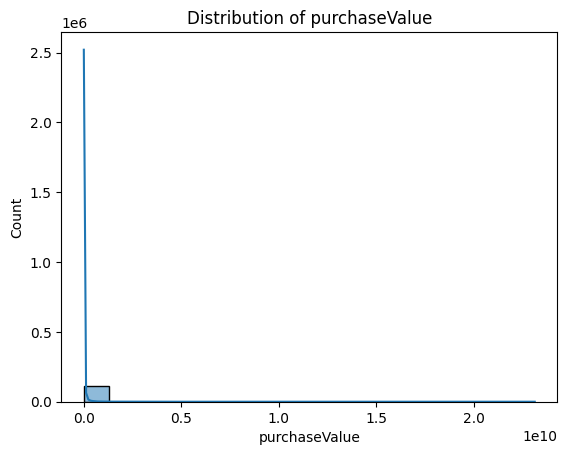

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


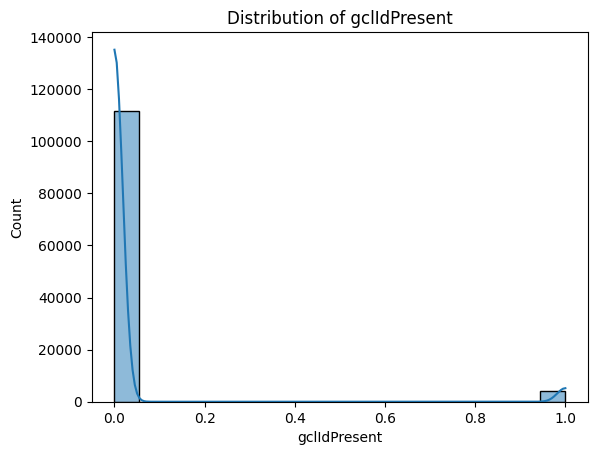

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


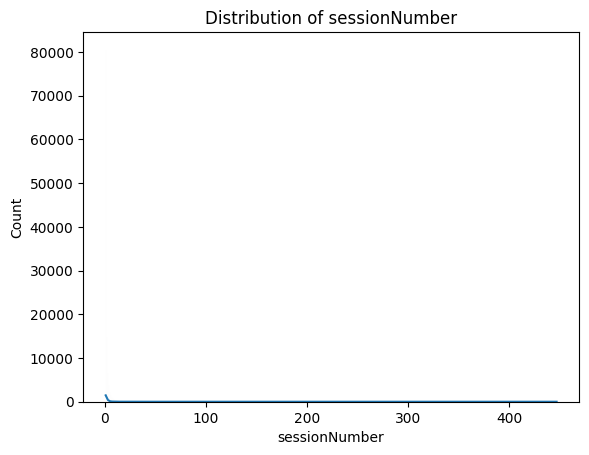

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


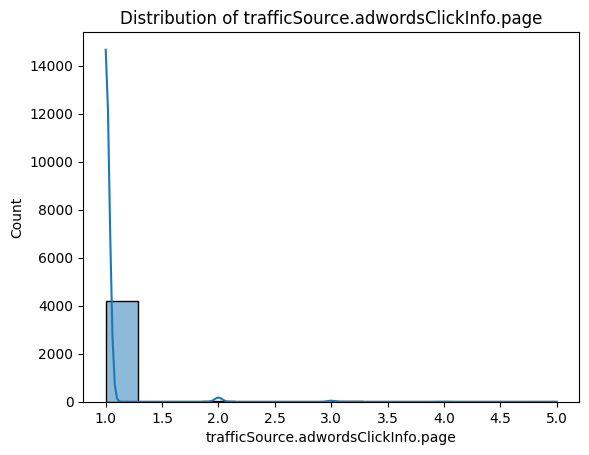

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


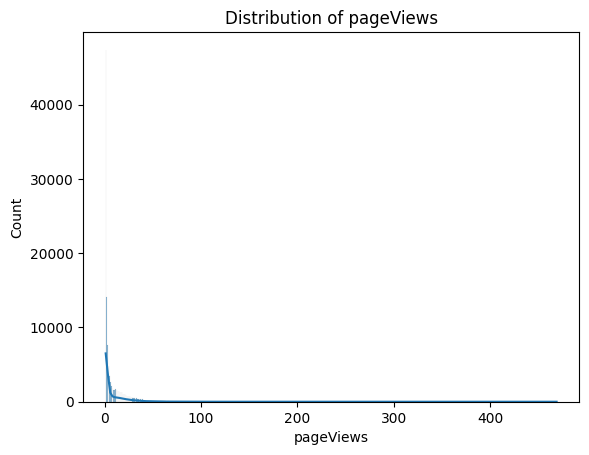

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


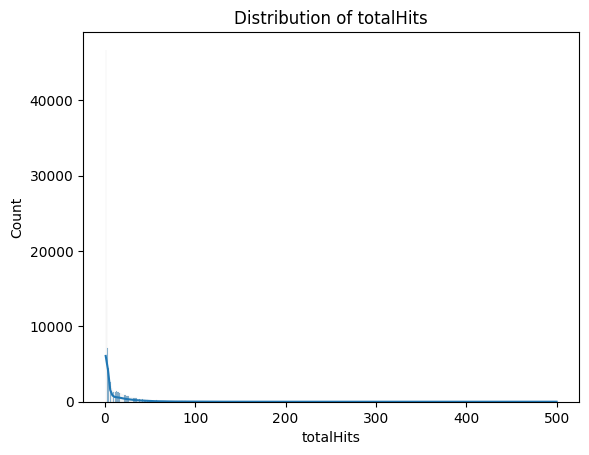

In [16]:
for col in ['purchaseValue', 'gclIdPresent','sessionNumber', 'trafficSource.adwordsClickInfo.page', 'pageViews', 'totalHits']:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [17]:
for col in df.columns:
    if df[col].nunique() <= 1:
        print(f"{col} is constant")

trafficSource.isTrueDirect is constant
device.screenResolution is constant
screenSize is constant
device.mobileDeviceBranding is constant
device.mobileInputSelector is constant
device.mobileDeviceMarketingName is constant
device.operatingSystemVersion is constant
device.flashVersion is constant
totals.visits is constant
geoNetwork.networkLocation is constant
trafficSource.adwordsClickInfo.isVideoAd is constant
browserMajor is constant
device.browserSize is constant
socialEngagementType is constant
locationZone is constant
device.mobileDeviceModel is constant
totals.bounces is constant
device.language is constant
device.browserVersion is constant
device.screenColors is constant
new_visits is constant


In [18]:
# Object & bool columns
cat_cols= df.select_dtypes(include=['object', 'bool']).columns.tolist()

# Add int columns with low cardinality (likely categorical)
low_card_ints = [col for col in df.select_dtypes(include='int64').columns 
                 if df[col].nunique() < 25]

# Final categorical column list
categorical_columns = cat_cols + low_card_ints
print("Categorical columns:", categorical_columns) 

Categorical columns: ['trafficSource.isTrueDirect', 'browser', 'device.screenResolution', 'trafficSource.adContent', 'trafficSource.keyword', 'screenSize', 'geoCluster', 'trafficSource.adwordsClickInfo.slot', 'device.mobileDeviceBranding', 'device.mobileInputSelector', 'trafficSource.campaign', 'device.mobileDeviceMarketingName', 'geoNetwork.networkDomain', 'device.operatingSystemVersion', 'device.flashVersion', 'geoNetwork.region', 'trafficSource', 'geoNetwork.networkLocation', 'os', 'geoNetwork.subContinent', 'trafficSource.medium', 'trafficSource.adwordsClickInfo.isVideoAd', 'browserMajor', 'locationCountry', 'device.browserSize', 'trafficSource.adwordsClickInfo.adNetworkType', 'socialEngagementType', 'geoNetwork.city', 'geoNetwork.metro', 'device.mobileDeviceModel', 'trafficSource.referralPath', 'device.language', 'deviceType', 'userChannel', 'device.browserVersion', 'device.screenColors', 'geoNetwork.continent', 'device.isMobile', 'gclIdPresent', 'totals.visits', 'locationZone']


In [19]:
for col in categorical_columns:
    if df[col].nunique() < 25:
        display(df.groupby(col)['purchaseValue'].agg(['mean', 'count']).sort_values('mean', ascending=False))

mean  count
trafficSource.isTrueDirect                     
True                        5.332436e+07  42890

mean   count
device.screenResolution                            
not available in demo dataset  2.656393e+07  116023

mean   count
screenSize                      
medium      2.656393e+07  116023

mean  count
geoCluster                     
Region_3    2.945375e+07  23221
Region_2    2.886466e+07  23294
Region_1    2.591078e+07  23019
Region_4    2.507895e+07  23278
Region_5    2.350093e+07  23211

mean  count
trafficSource.adwordsClickInfo.slot                     
Top                                  3.205864e+07   2721
RHS                                  6.551638e+05   1557
Google Display Network               0.000000e+00      3

mean   count
device.mobileDeviceBranding                        
not available in demo dataset  2.656393e+07  116023

mean   count
device.mobileInputSelector                         
not available in demo dataset  2.656393e+07  116023

mean   count
device.mobileDeviceMarketingName                      
not available in demo dataset     2.656393e+07  116023

mean  count
geoNetwork.networkDomain                     
domain3                   2.685677e+07  38609
domain1                   2.659935e+07  38795
domain2                   2.623559e+07  38619

mean   count
device.operatingSystemVersion                      
not available in demo dataset  2.656393e+07  116023

mean   count
device.flashVersion                                
not available in demo dataset  2.656393e+07  116023

mean   count
geoNetwork.networkLocation                         
not available in demo dataset  2.656393e+07  116023

mean  count
os                                   
Chrome OS         7.506782e+07   4743
Macintosh         4.543571e+07  37659
Windows           2.058279e+07  39135
Linux             1.784342e+07   5075
Android           4.511533e+06  15866
iOS               3.700139e+06  12762
Windows Phone     5.557895e+05     95
Playstation Vita  0.000000e+00      2
Xbox              0.000000e+00      9
Tizen             0.000000e+00     22
Samsung           0.000000e+00     46
(not set)         0.000000e+00    565
OS/2              0.000000e+00      4
Nintendo Wii      0.000000e+00     14
FreeBSD           0.000000e+00      1
Firefox OS        0.000000e+00      1
BlackBerry        0.000000e+00     18
Nintendo WiiU     0.000000e+00      6

mean  count
geoNetwork.subContinent                     
Northern America         4.676389e+07  63596
Eastern Africa           4.589482e+07    193
Western Africa           1.618032e+07    315
Caribbean                1.207747e+07    249
(not set)                6.768382e+06    136
South America            5.988750e+06   4336
Australasia              4.855693e+06   1588
Eastern Asia             4.640272e+06   5036
Central America          2.307522e+06   1675
Southern Africa          1.181667e+06    264
Southeast Asia           1.134830e+06   7151
Western Europe           9.045642e+05   6264
Northern Europe          9.028076e+05   5998
Western Asia             8.921502e+05   3581
Southern Europe          6.266551e+05   3755
Central Asia             5.300000e+05    132
Eastern Europe           4.540823e+05   4277
Southern Asia            3.202313e+05   6484
Northern Africa          9.899892e+04    929
Middle Africa            0.000000e+00     46
Polynesia                0.000000e+00      2
Micronesian Region       0.000000e+00     11
Melanesia                0.000000e+00      5

mean  count
trafficSource.medium                     
cpm                   2.153527e+08    802
(none)                4.573531e+07  36837
cpc                   1.827197e+07   4286
referral              1.764453e+07  31657
organic               1.442734e+07  40654
(not set)             1.998000e+06     10
affiliate             6.340180e+05   1777

mean  count
trafficSource.adwordsClickInfo.isVideoAd                     
False                                     2.061473e+07   4281

mean   count
browserMajor                                       
not available in demo dataset  2.656393e+07  116023

mean   count
device.browserSize                                 
not available in demo dataset  2.656393e+07  116023

mean  count
trafficSource.adwordsClickInfo.adNetworkType                     
Google Search                                 3.165450e+07   2784
Content                                       8.384102e+04   1497

mean   count
socialEngagementType                      
Not Socially Engaged  2.656393e+07  116023

mean   count
device.mobileDeviceModel                           
not available in demo dataset  2.656393e+07  116023

mean   count
device.language                                    
not available in demo dataset  2.656393e+07  116023

mean  count
deviceType                     
desktop     3.424728e+07  86480
tablet      5.091584e+06   3693
mobile      3.927222e+06  25850

mean  count
userChannel                        
Display         7.514455e+07   2301
Referral        5.917188e+07  21932
Direct          4.332910e+07  18886
Paid Search     2.711639e+07   3406
Organic Search  1.469966e+07  46925
(Other)         1.998000e+06     10
Affiliates      6.340180e+05   1777
Social          4.696204e+05  20786

mean   count
device.browserVersion                              
not available in demo dataset  2.656393e+07  116023

mean   count
device.screenColors                                
not available in demo dataset  2.656393e+07  116023

mean  count
geoNetwork.continent                     
Americas              4.304335e+07  69856
Africa                8.218907e+06   1747
(not set)             6.768382e+06    136
Oceania               4.801270e+06   1606
Asia                  1.645135e+06  22384
Europe                7.576836e+05  20294

mean  count
device.isMobile                     
False            3.424168e+07  86494
True             4.074888e+06  29529

mean   count
gclIdPresent                      
0             2.679131e+07  111728
1             2.064888e+07    4295

mean   count
totals.visits                      
1              2.656393e+07  116023

mean   count
locationZone                      
8             2.656393e+07  116023

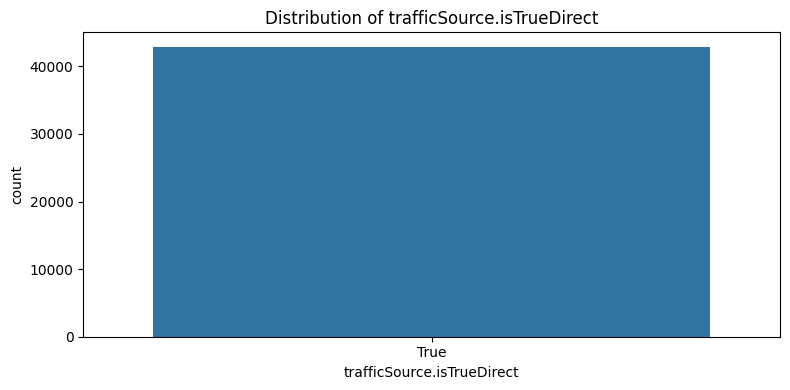

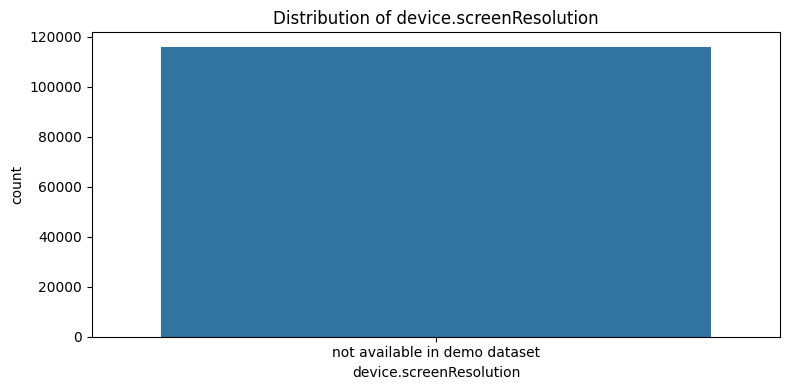

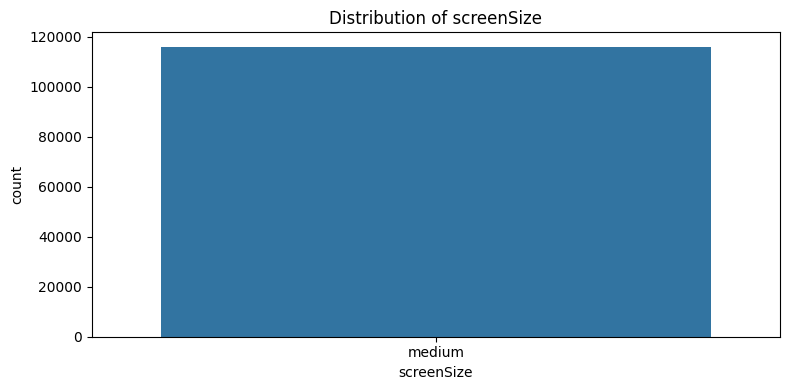

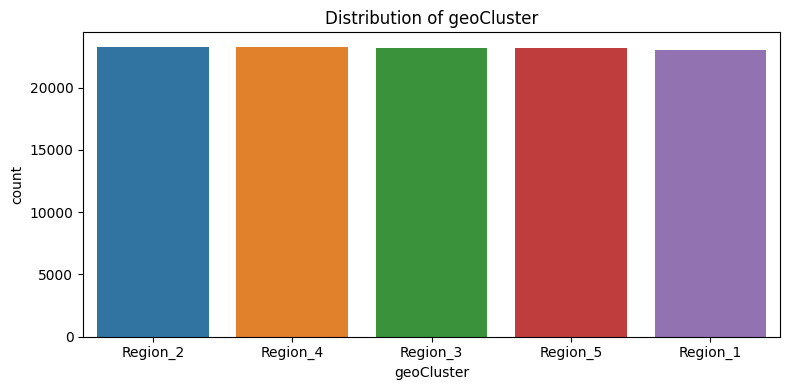

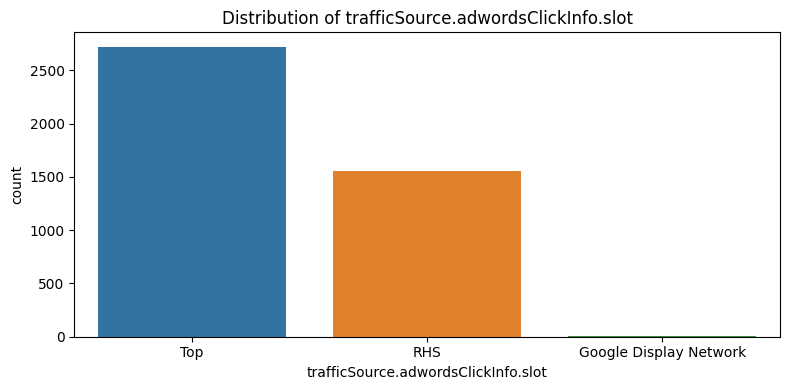

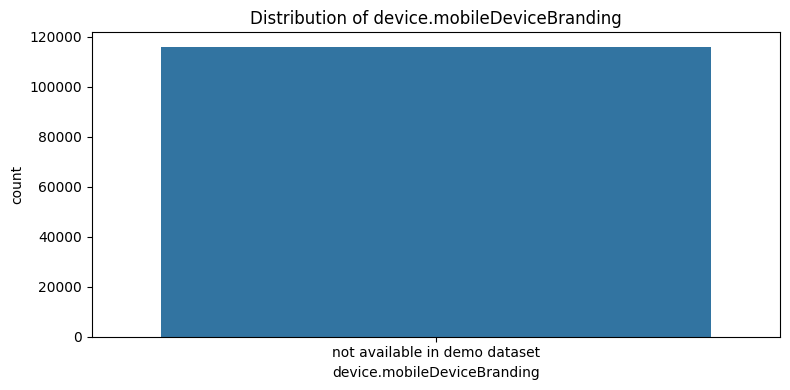

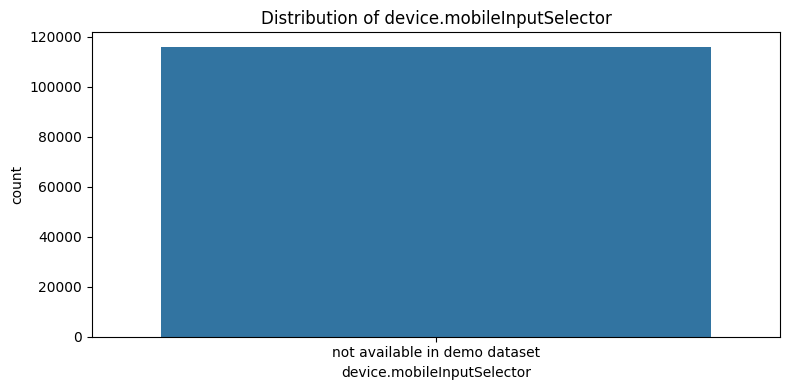

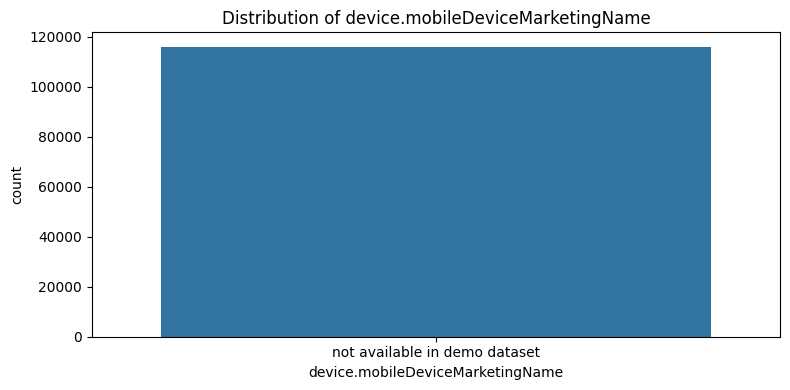

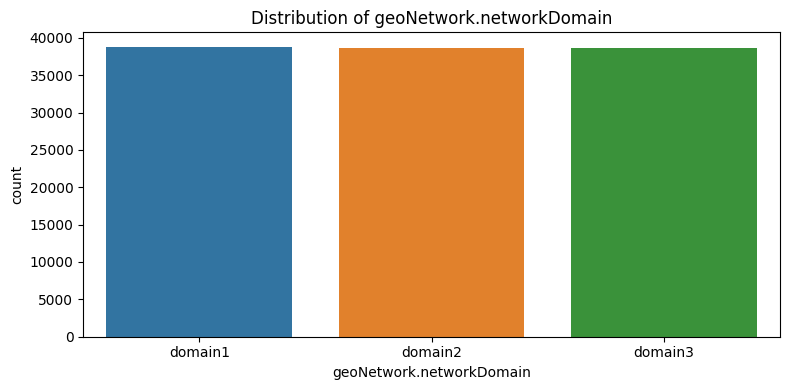

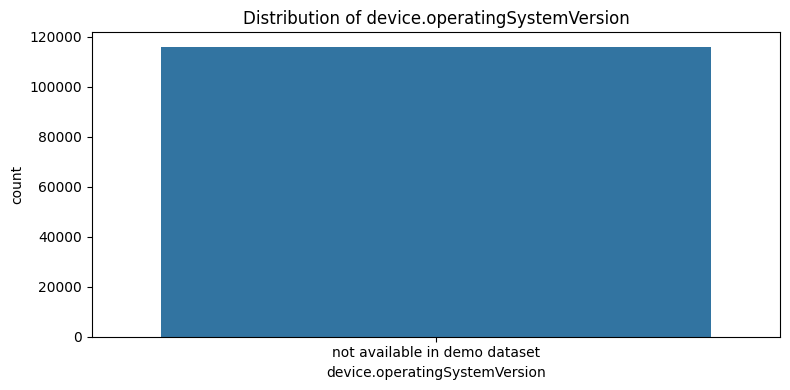

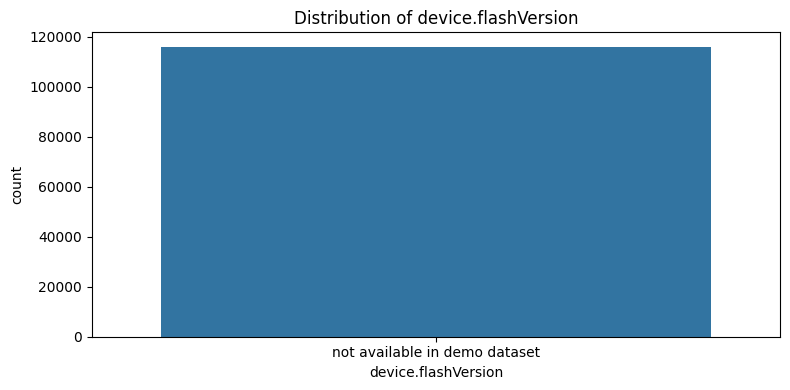

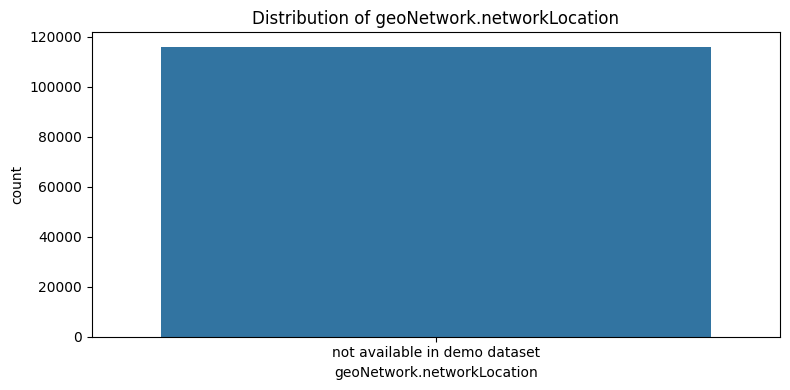

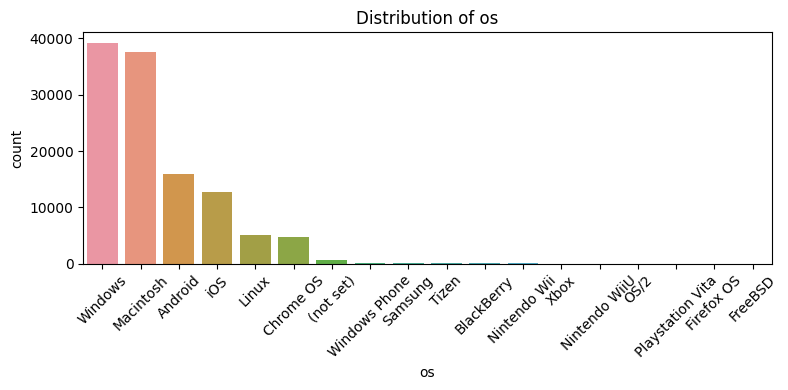

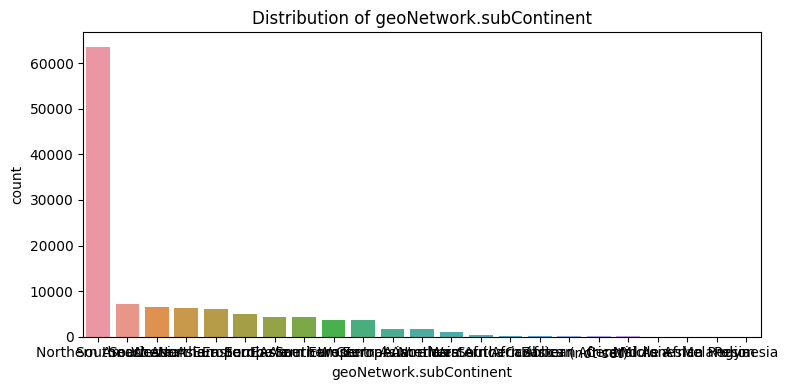

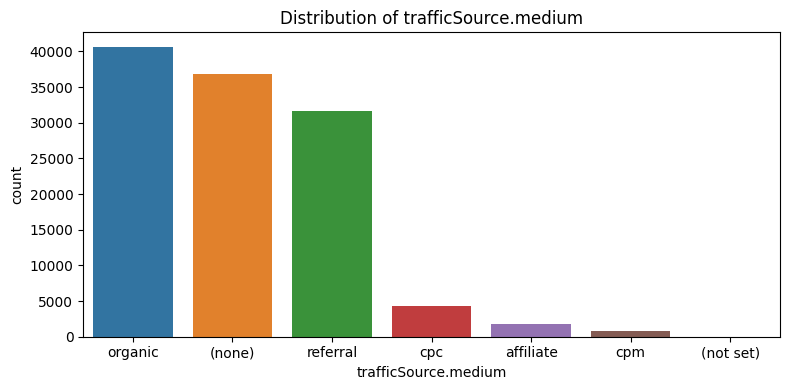

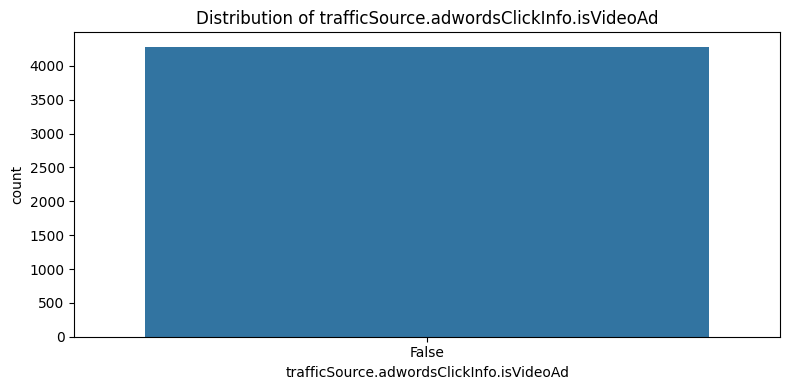

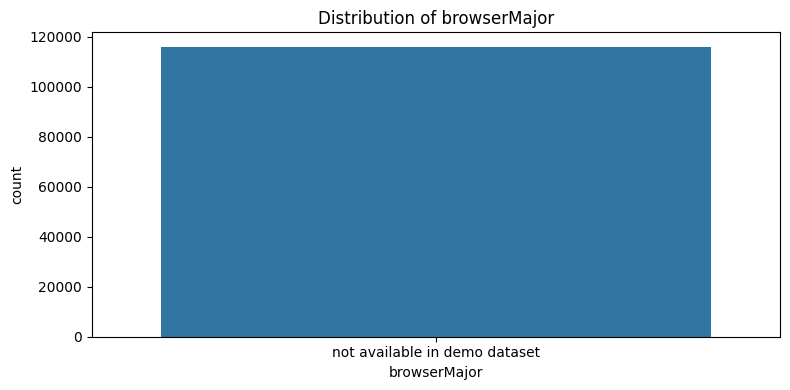

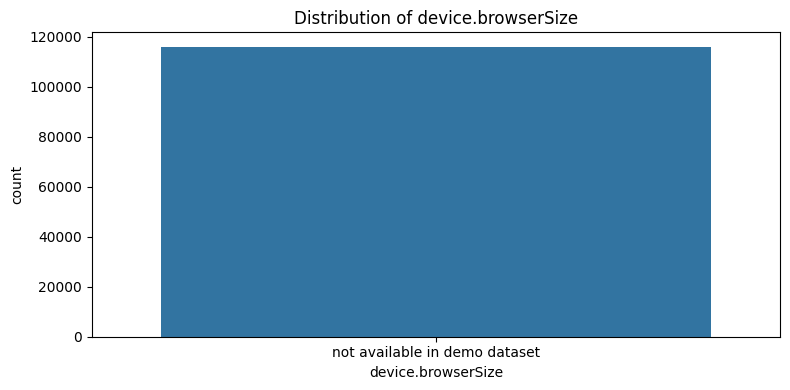

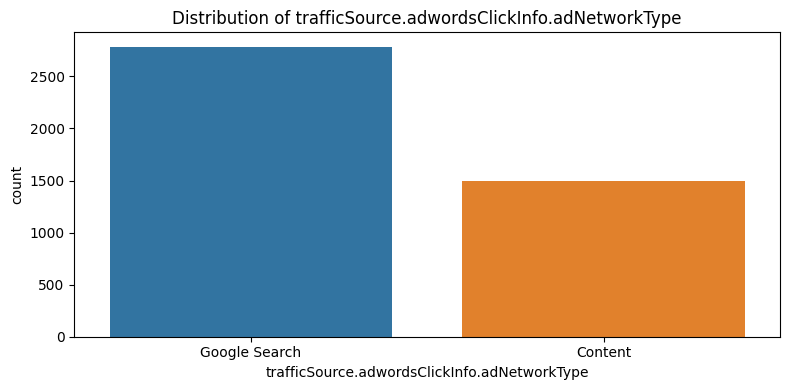

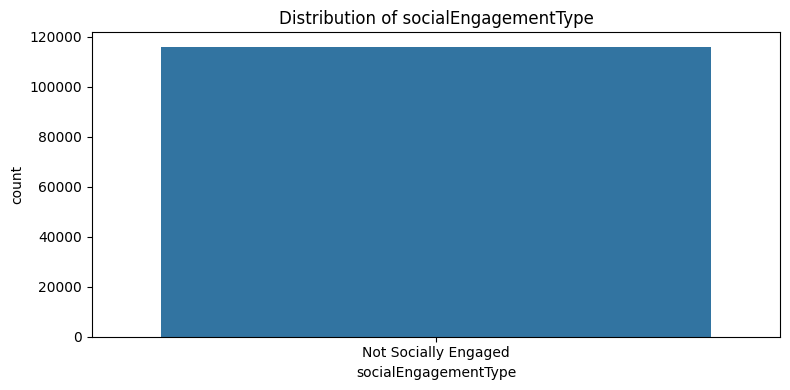

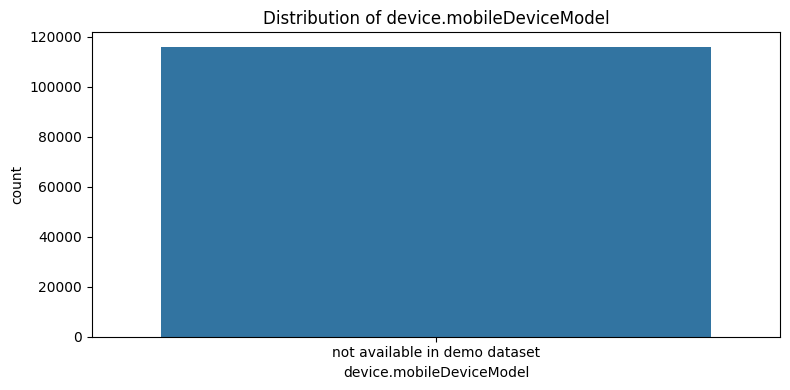

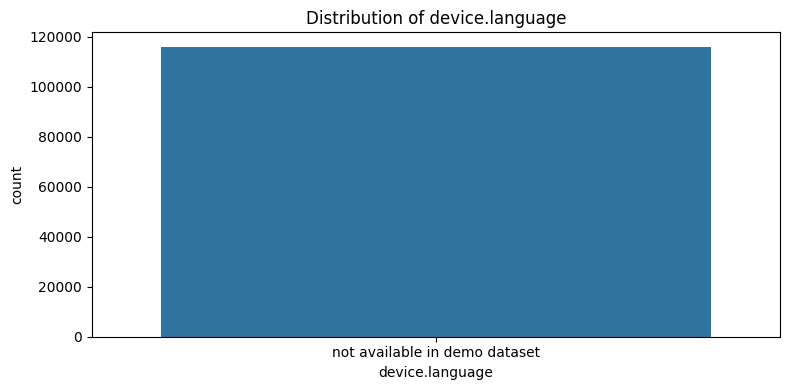

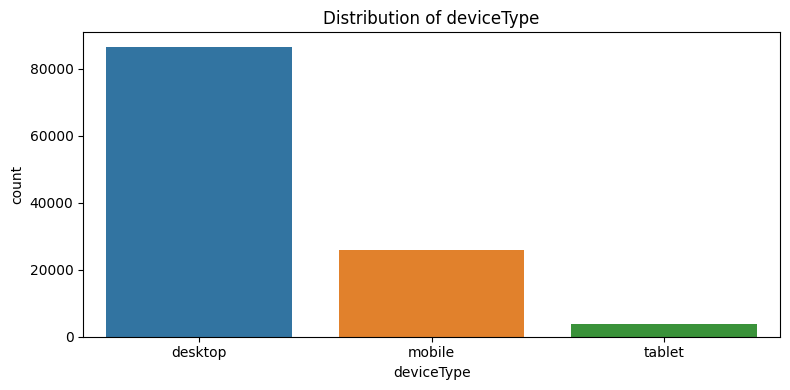

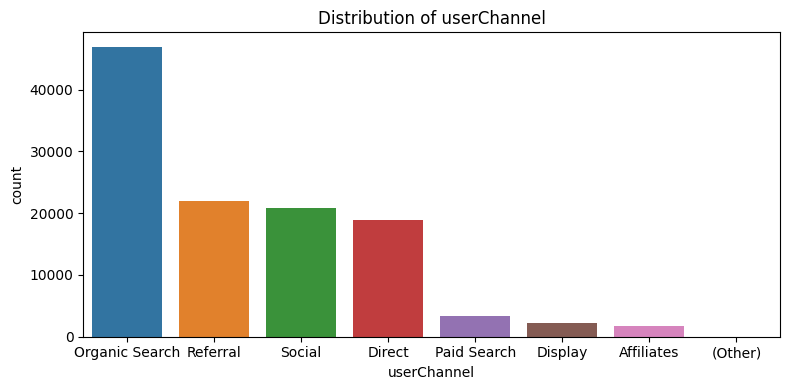

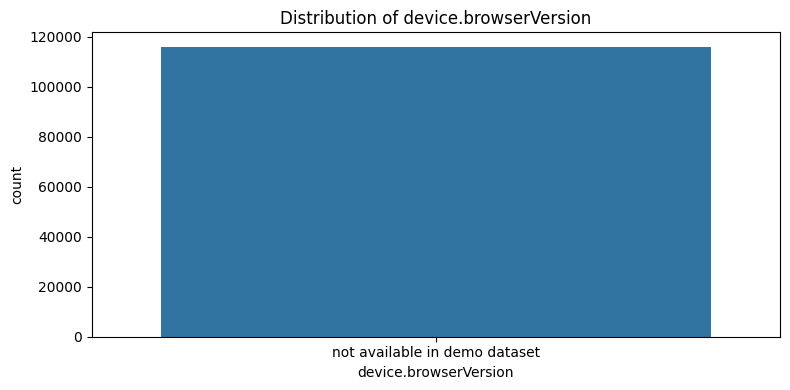

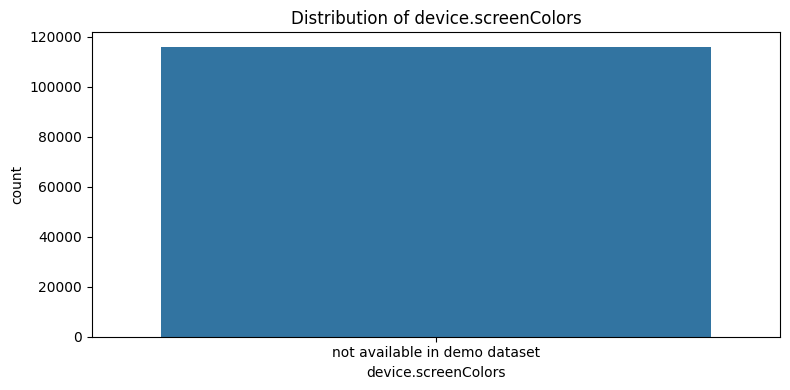

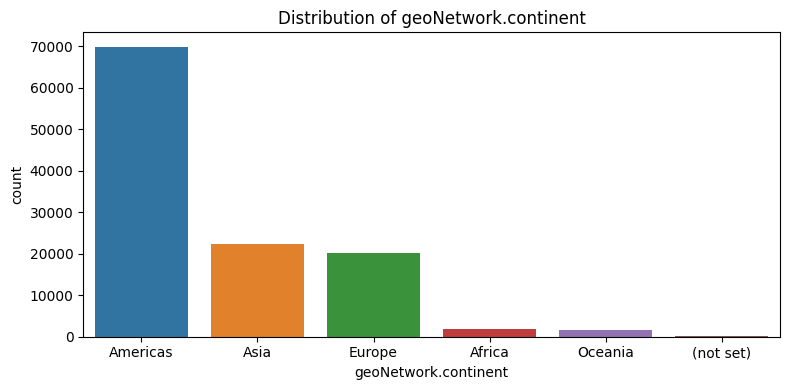

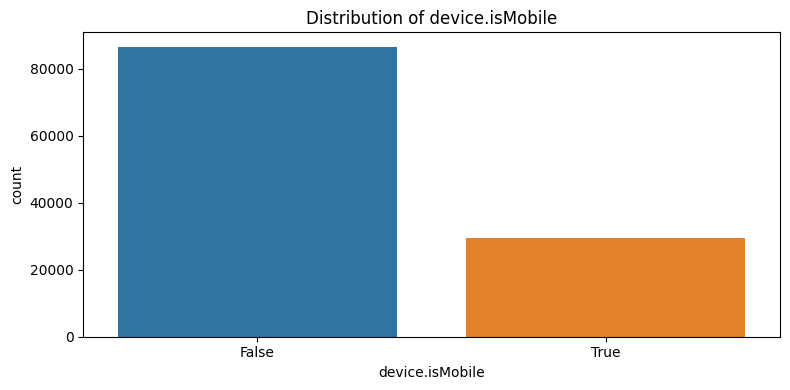

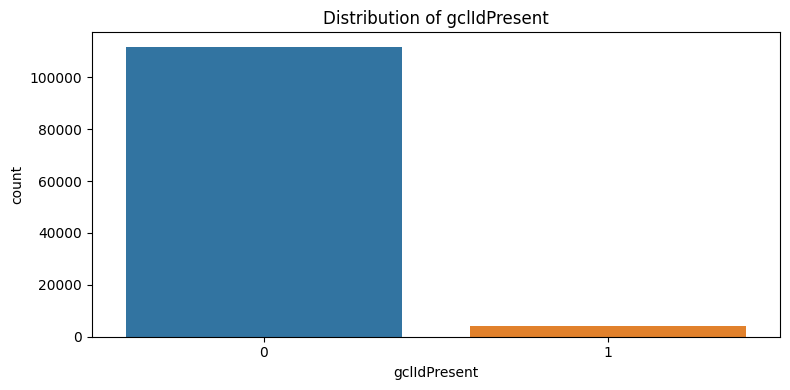

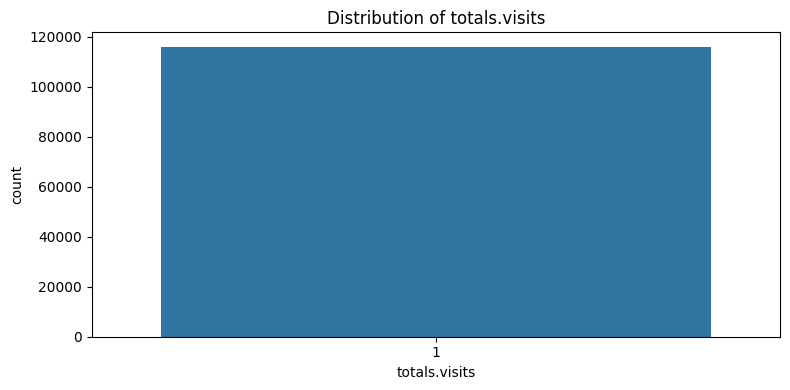

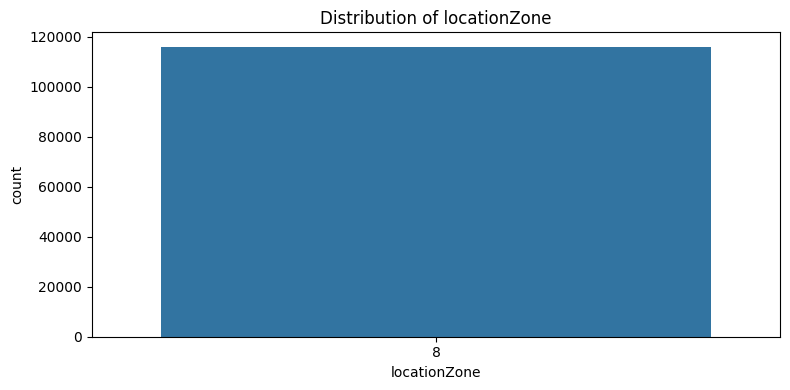

In [20]:
for col in categorical_columns:
    if df[col].nunique() < 25:  
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, x=col, order=df[col].value_counts().index)
        plt.title(f'Distribution of {col}')

        # Apply 45-degree rotation only for 'os'
        if col == 'os':
            plt.xticks(rotation=45)
        else:
            plt.xticks(rotation=0)

        plt.tight_layout()
        plt.show()


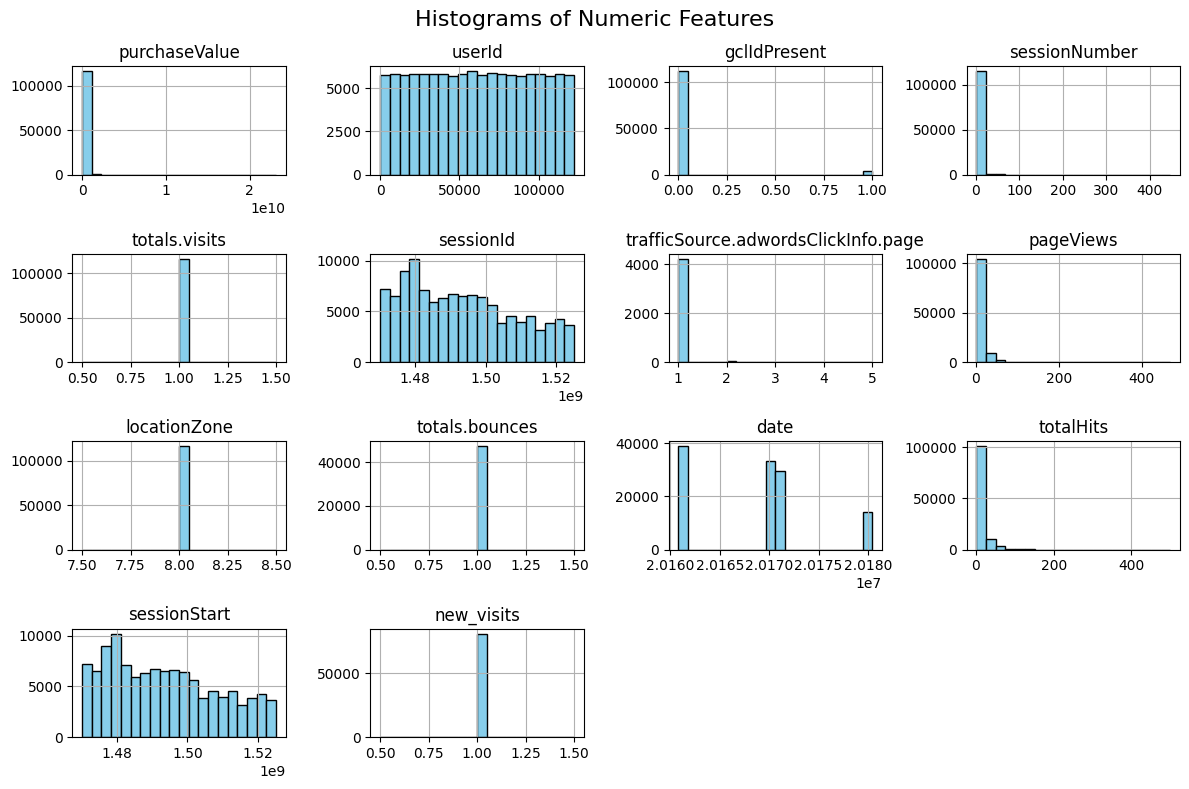

In [21]:
#Histogram
df.hist(figsize=(12, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

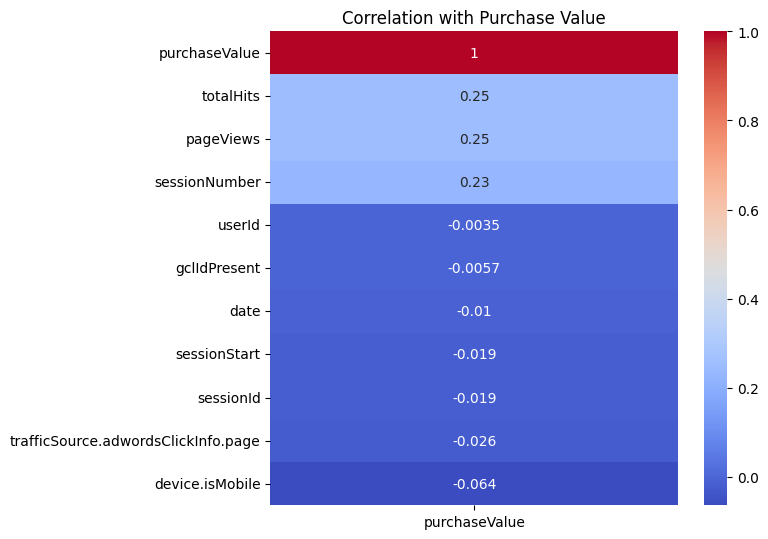

In [22]:
# Calculate correlation of all numeric columns with purchaseValue
correlation = df.corr(numeric_only=True)['purchaseValue'].sort_values(ascending=False)

# Filter out only features that have some correlation (non-NaN)
correlation = correlation[correlation.notna()]

# Create a heatmap
plt.figure(figsize=(8, len(correlation) * 0.5))
sns.heatmap(correlation.to_frame(), annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation with Purchase Value')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


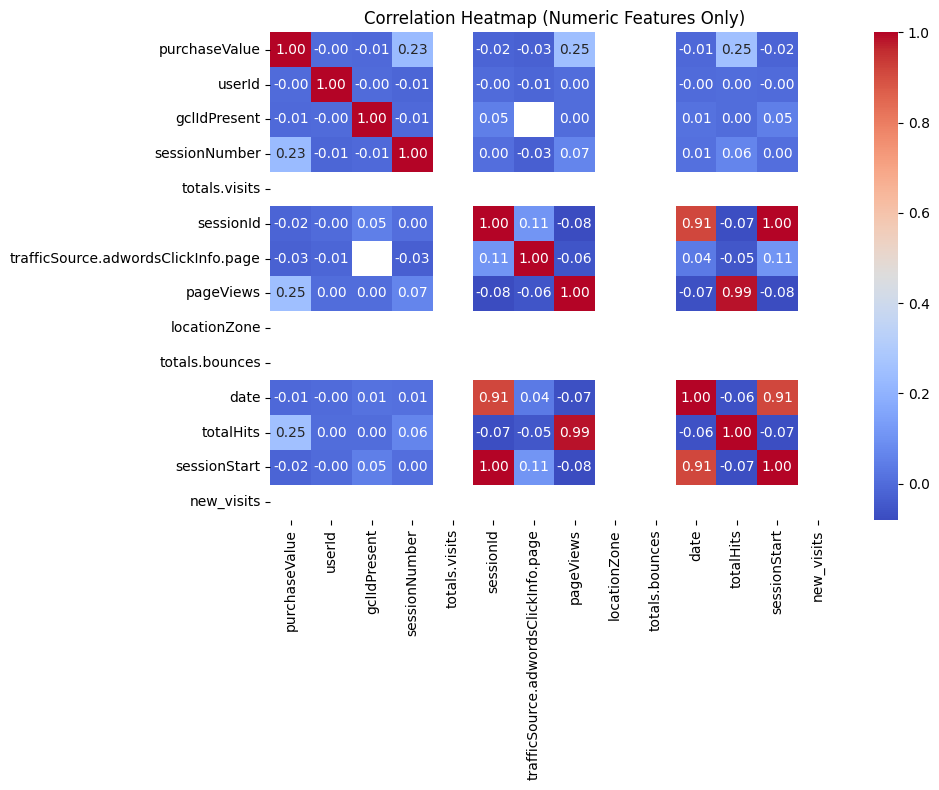

In [23]:
numeric_df = df[numerical_columns]

corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


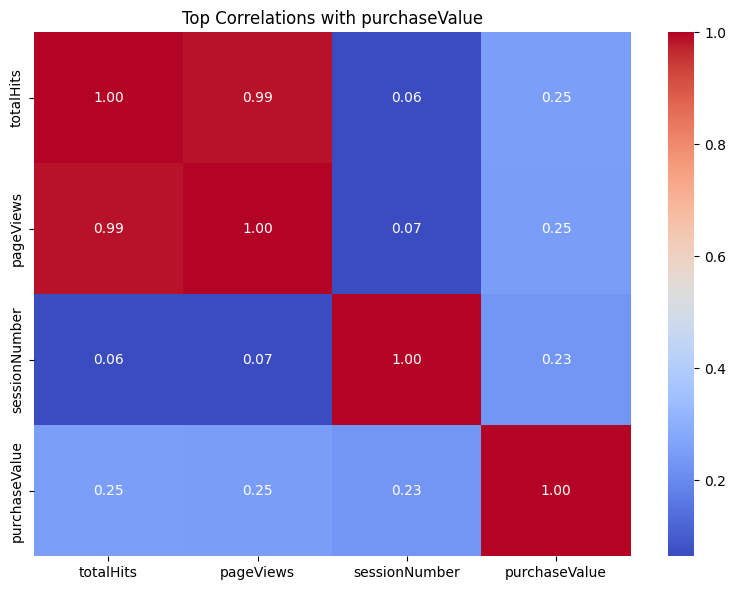

In [24]:
corr = numeric_df.corr()
target_corr = corr['purchaseValue'].drop('purchaseValue')
strong_corr = target_corr[abs(target_corr) > 0.2].sort_values(ascending=False)
cols_to_plot = strong_corr.index.tolist() + ['purchaseValue']
filtered_corr = corr.loc[cols_to_plot, cols_to_plot]
plt.figure(figsize=(8, 6))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Top Correlations with purchaseValue')
plt.tight_layout()
plt.show()


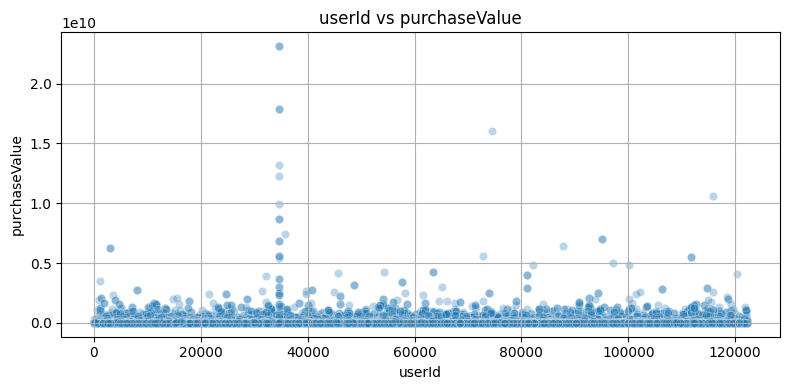

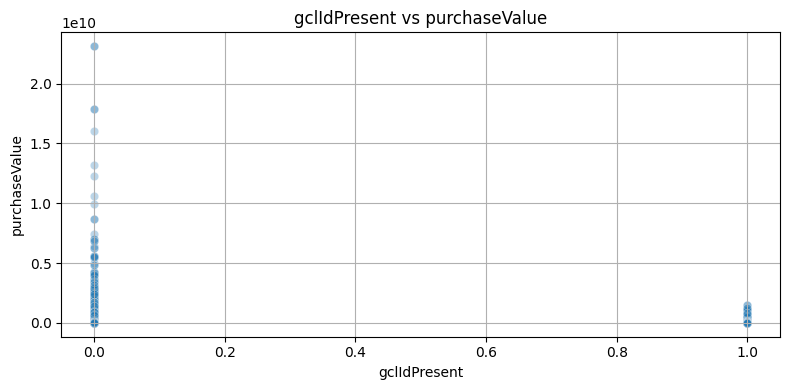

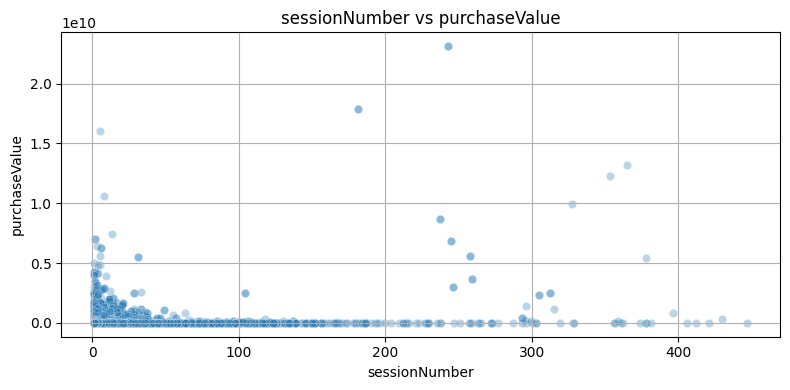

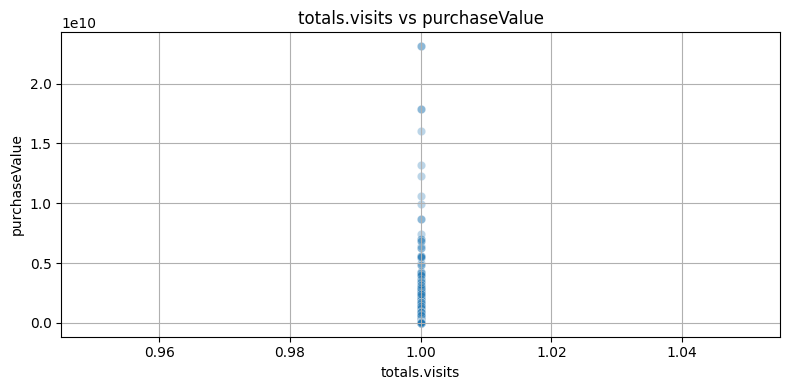

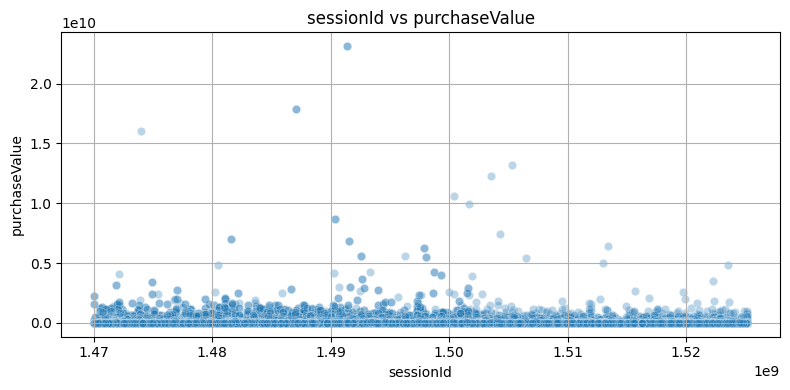

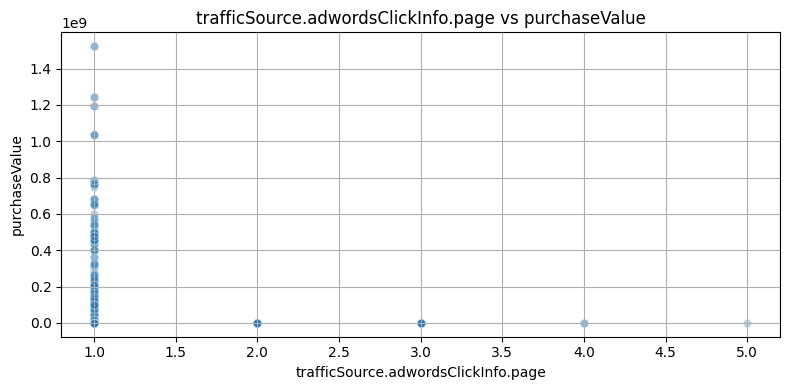

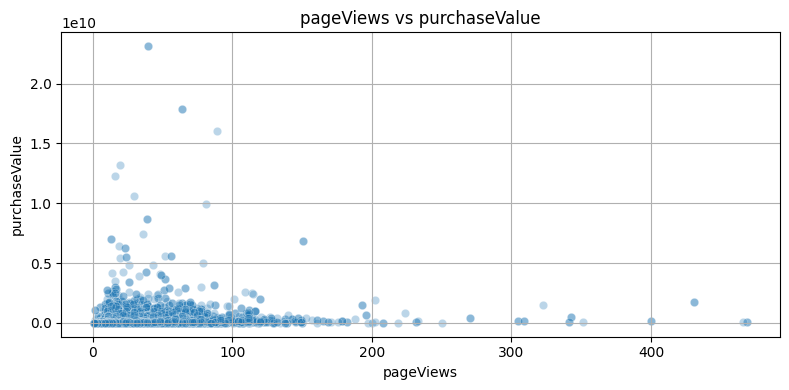

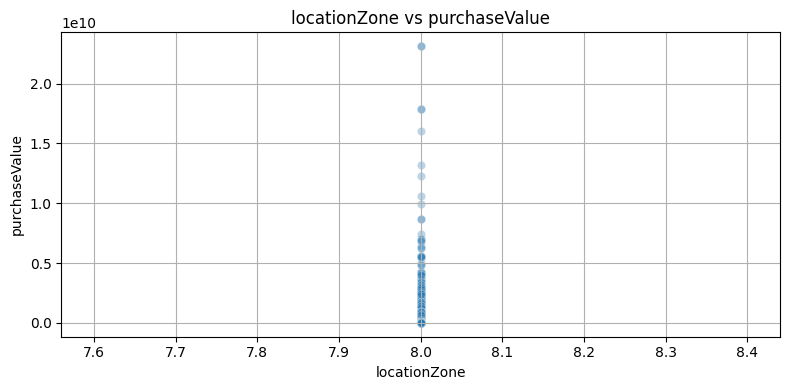

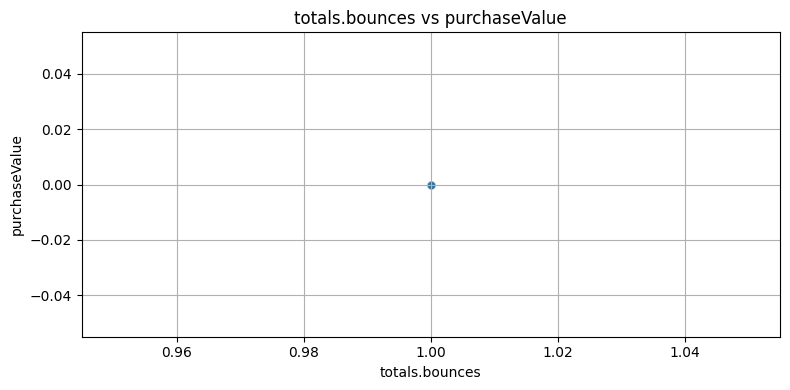

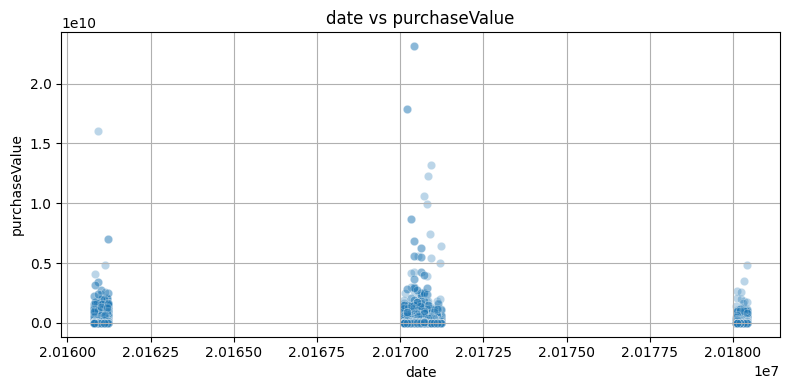

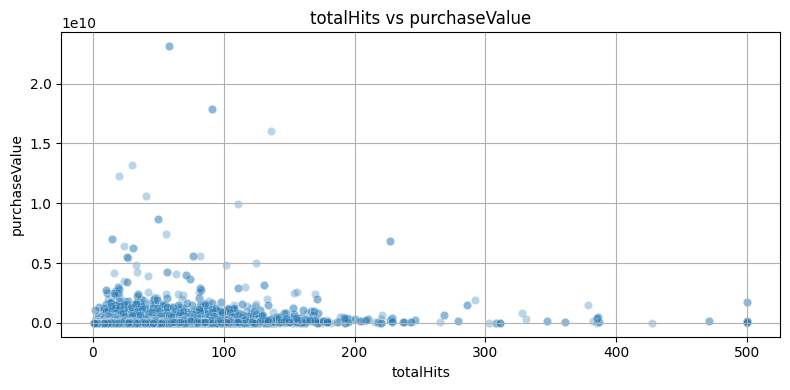

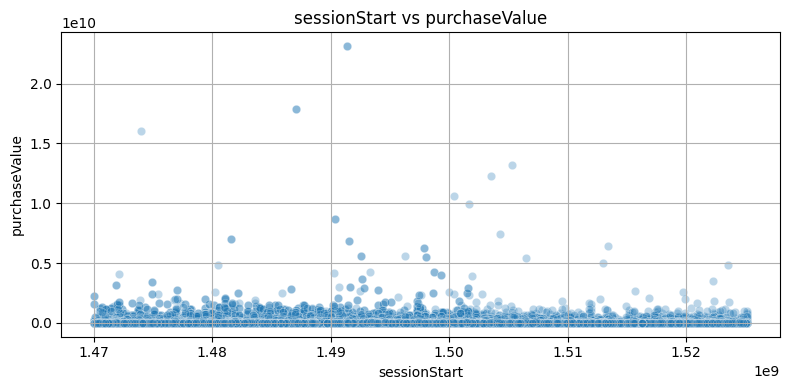

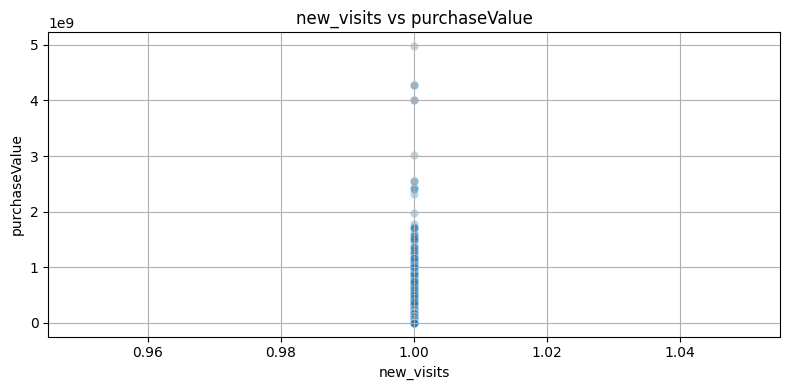

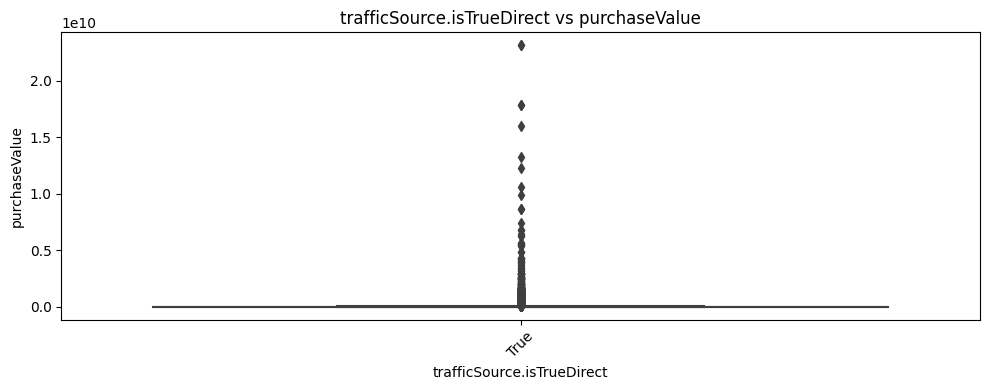

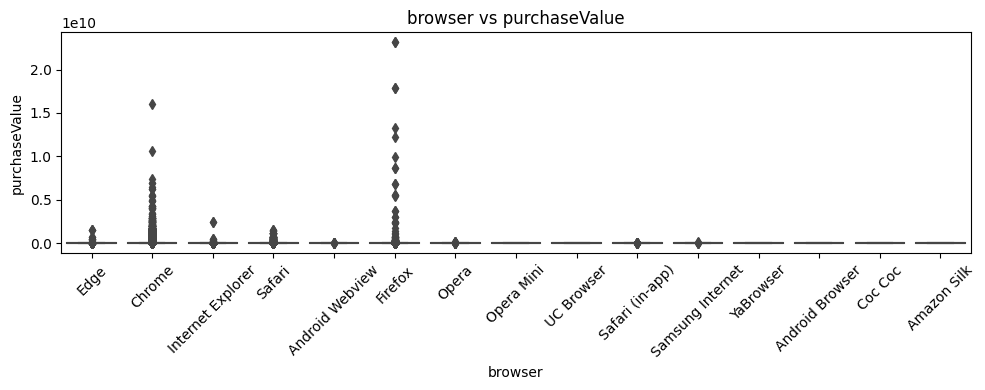

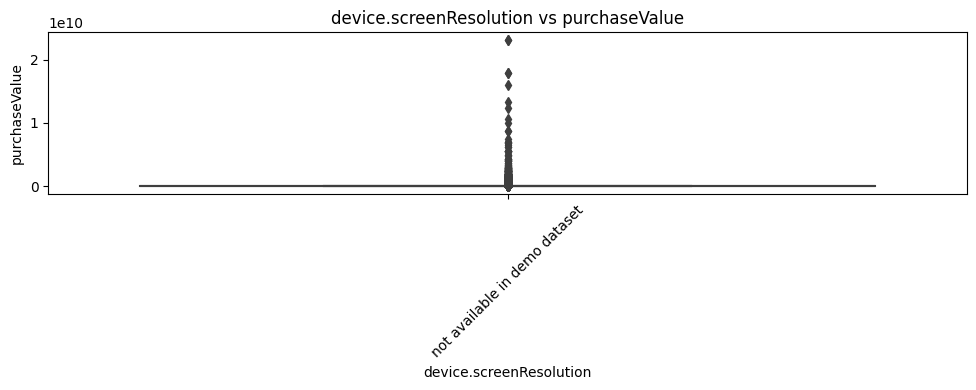

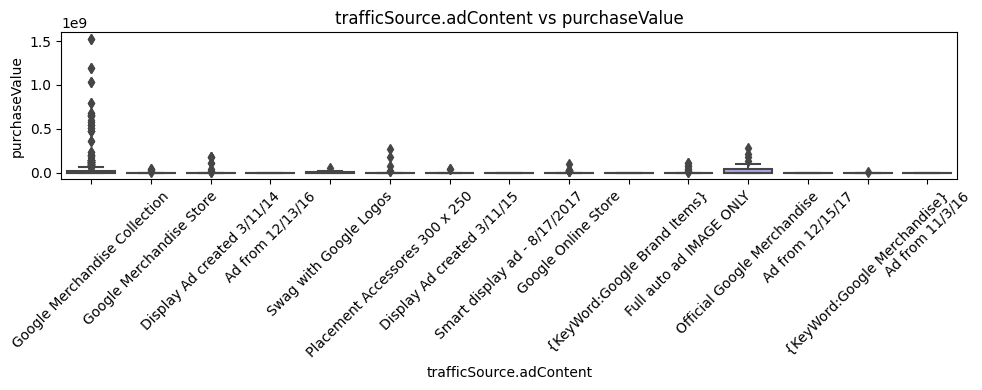

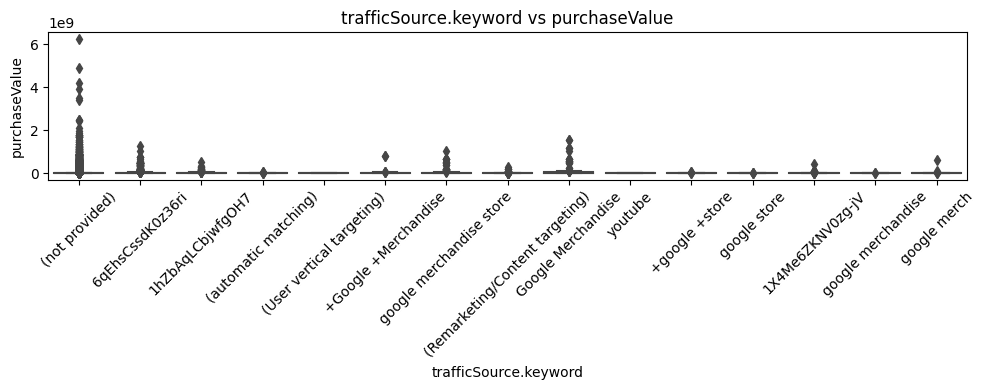

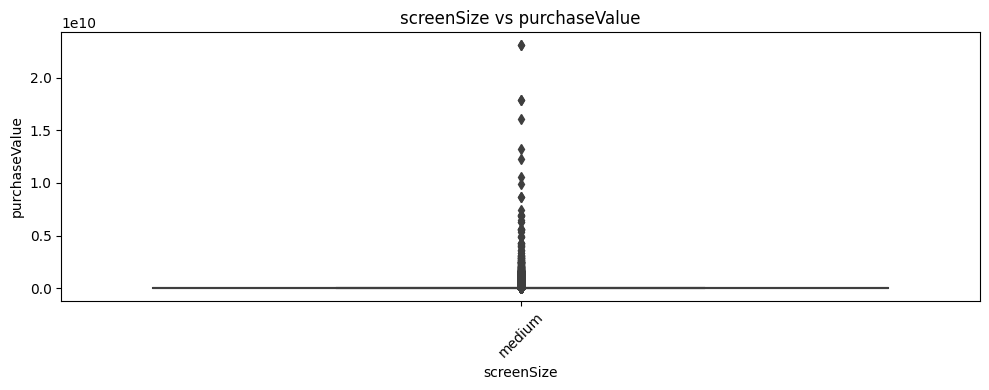

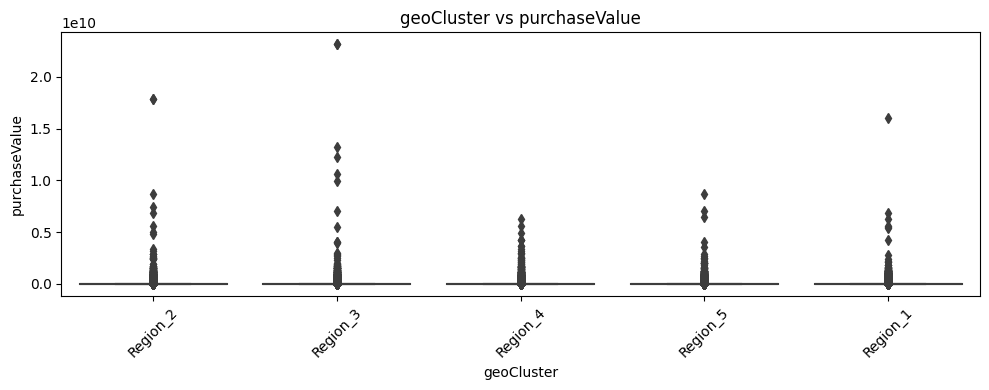

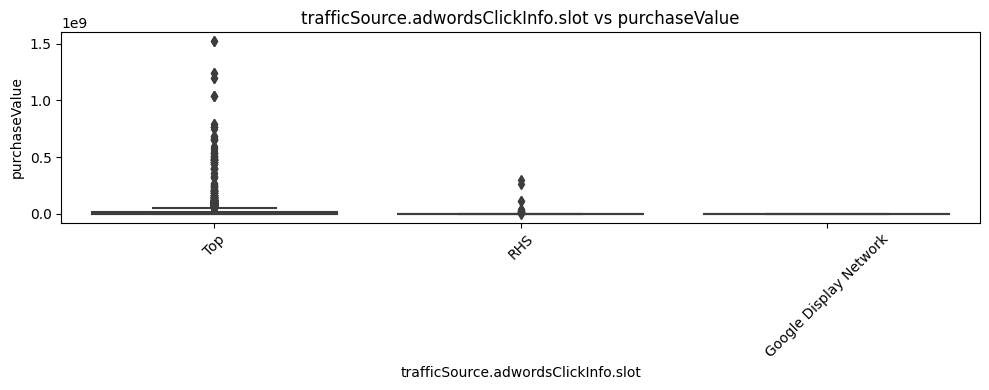

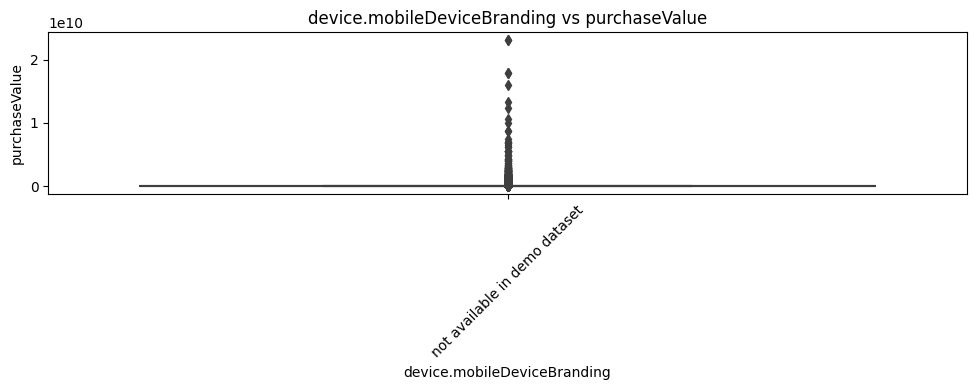

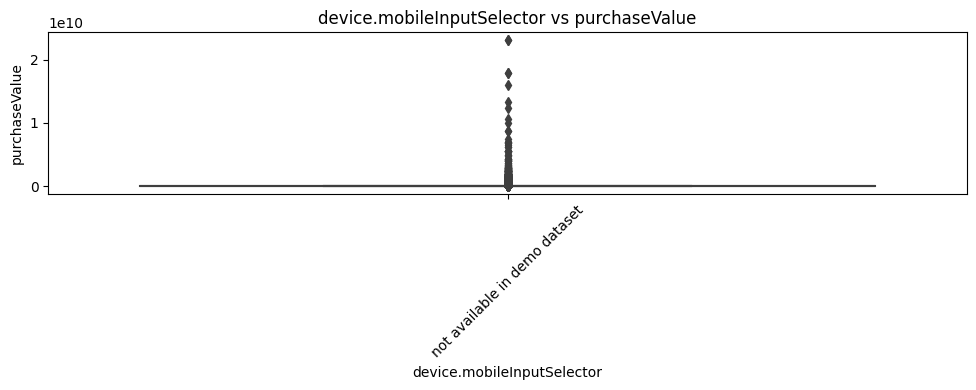

/tmp/ipykernel_13/3846104498.py:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


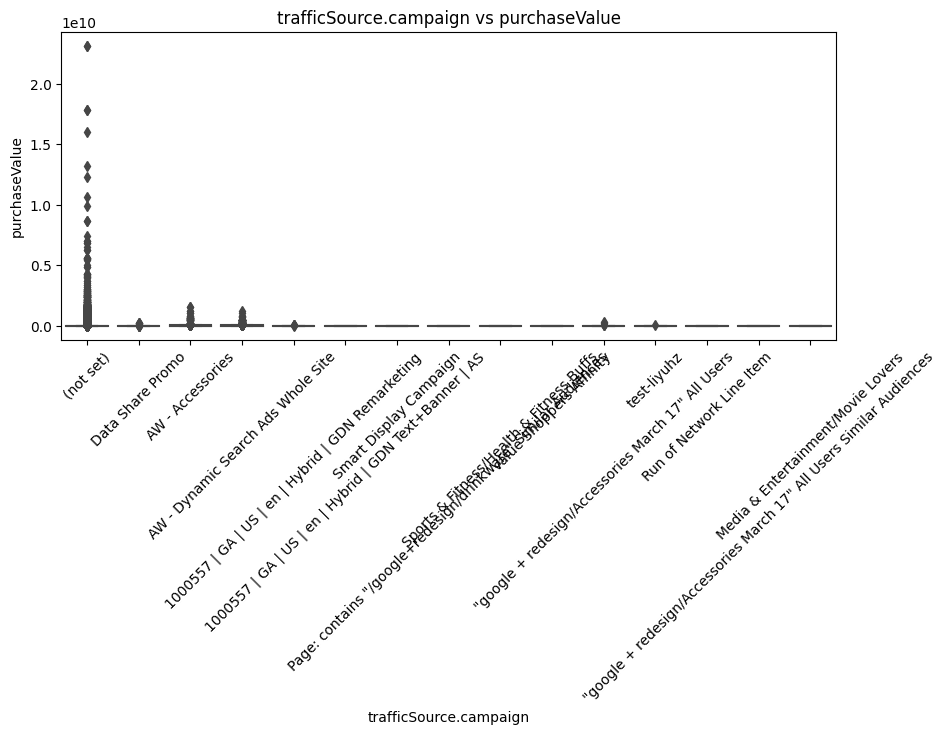

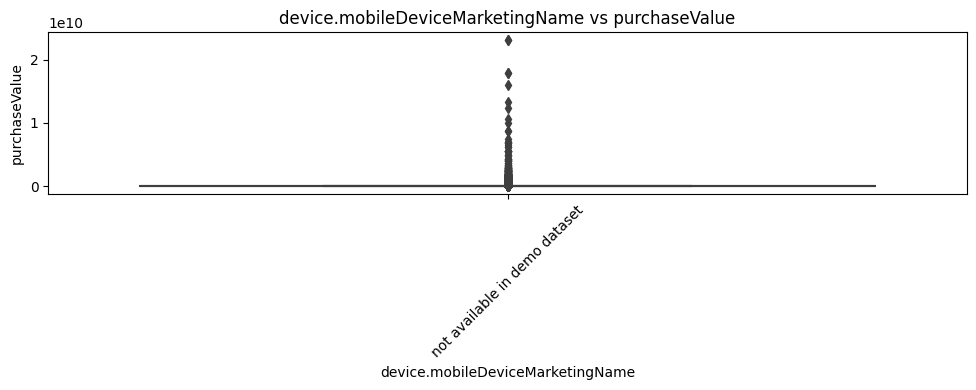

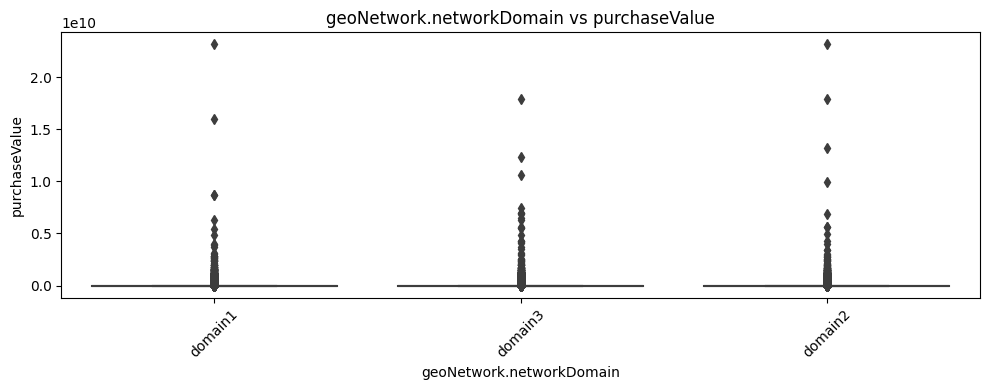

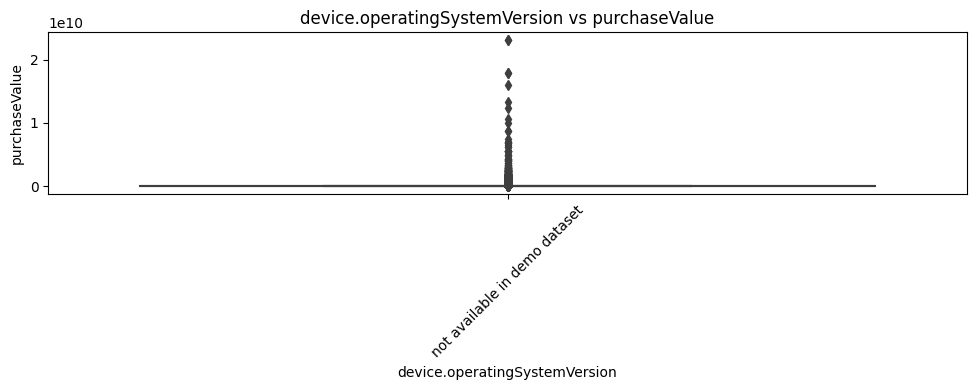

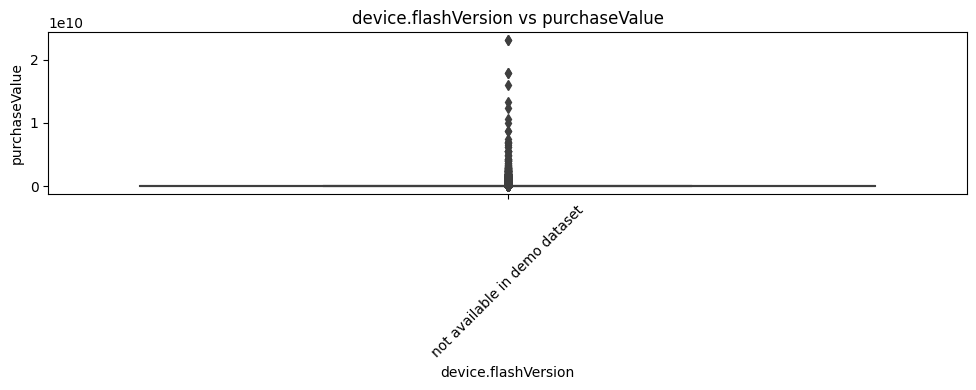

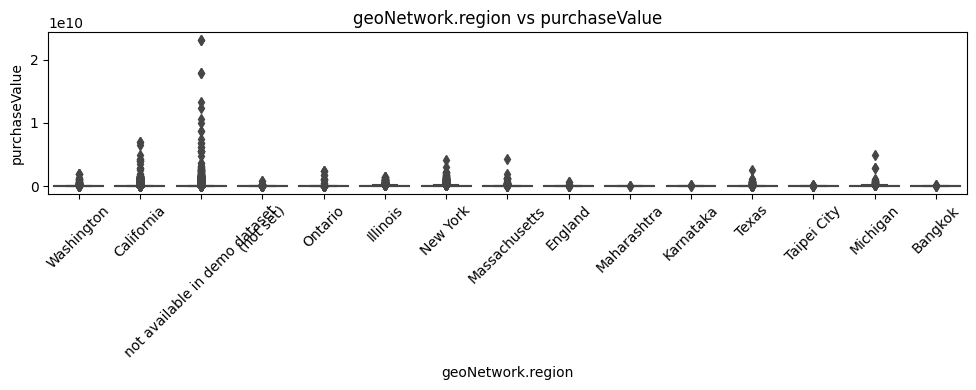

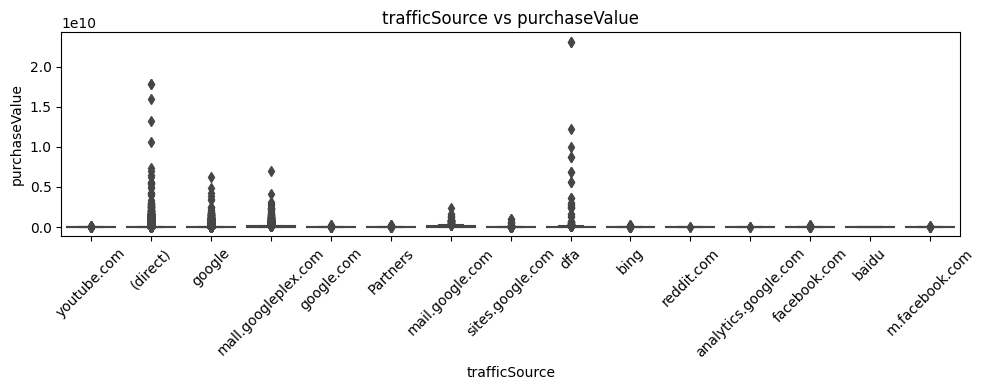

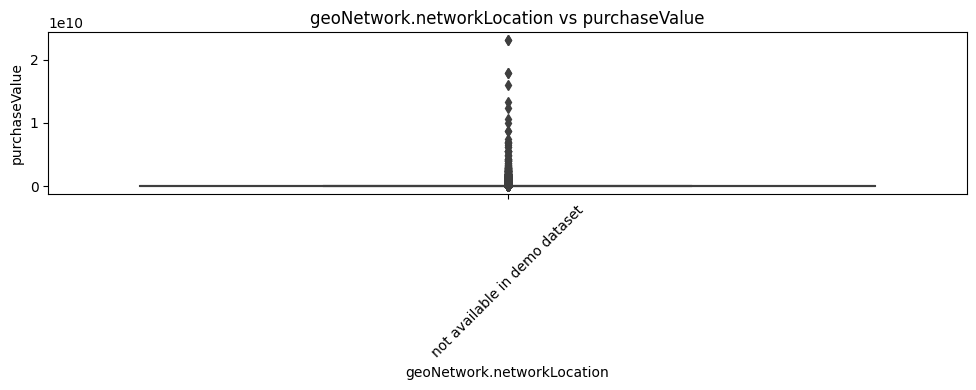

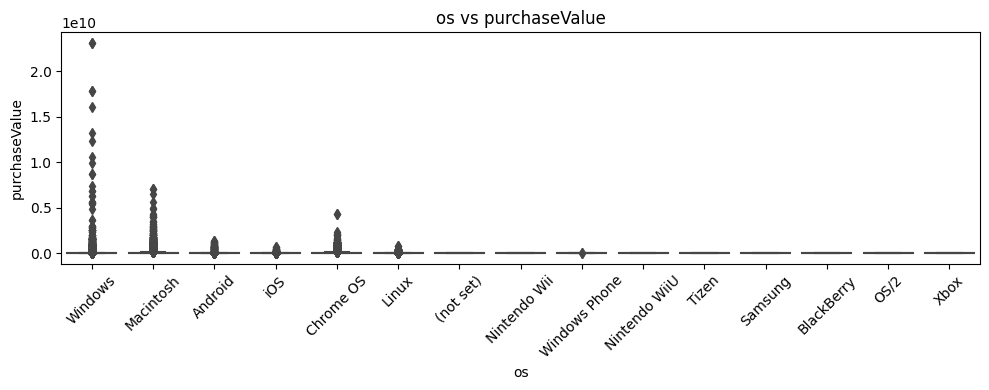

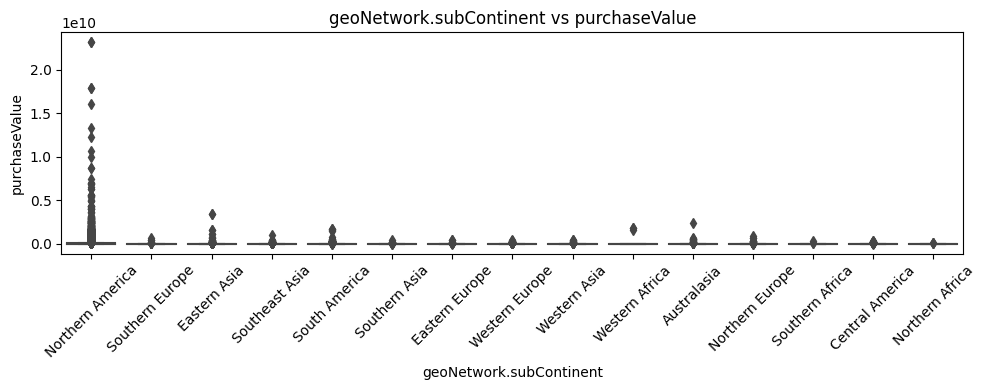

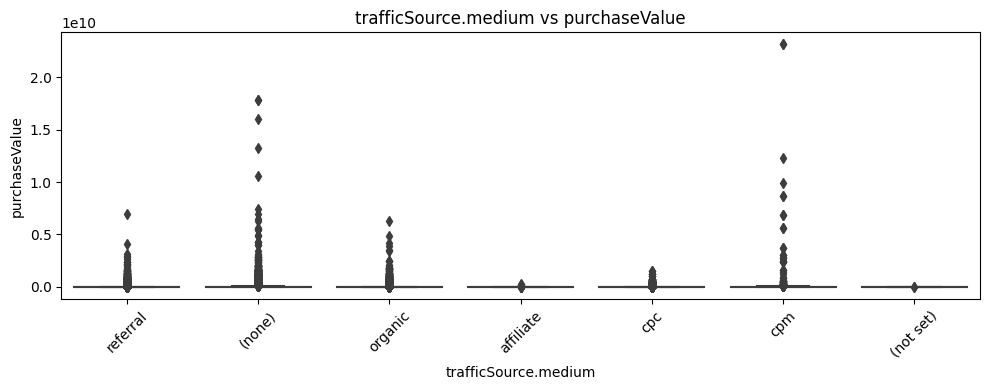

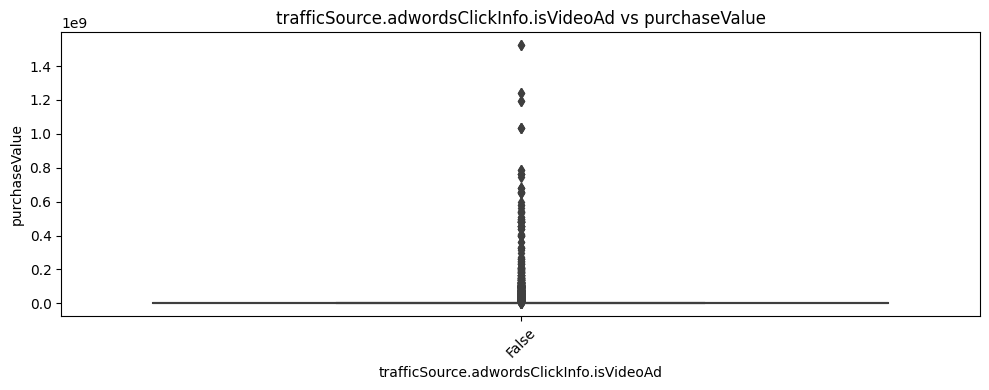

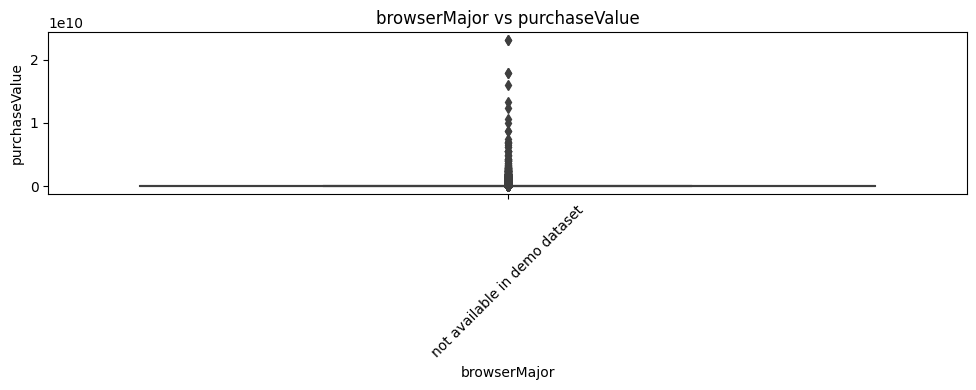

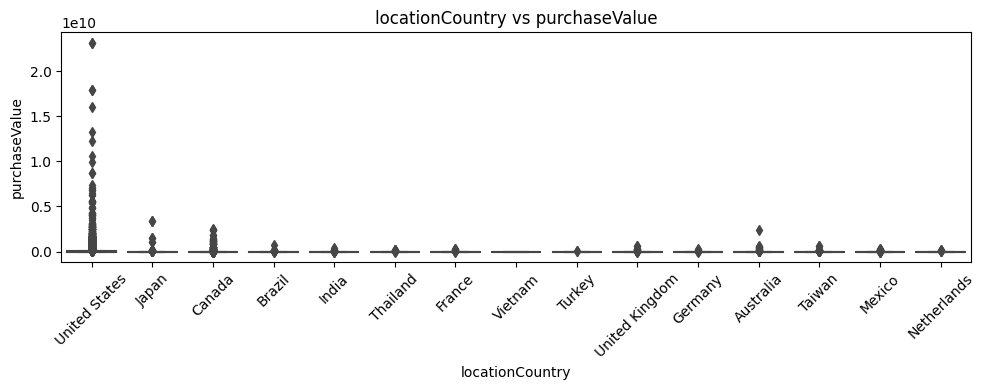

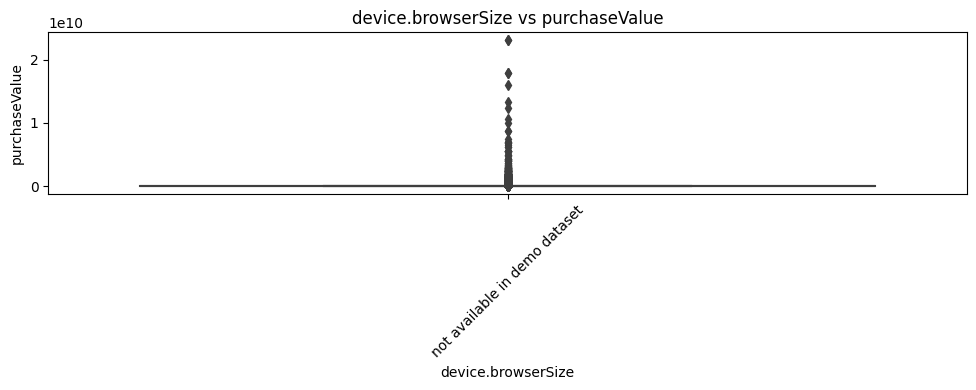

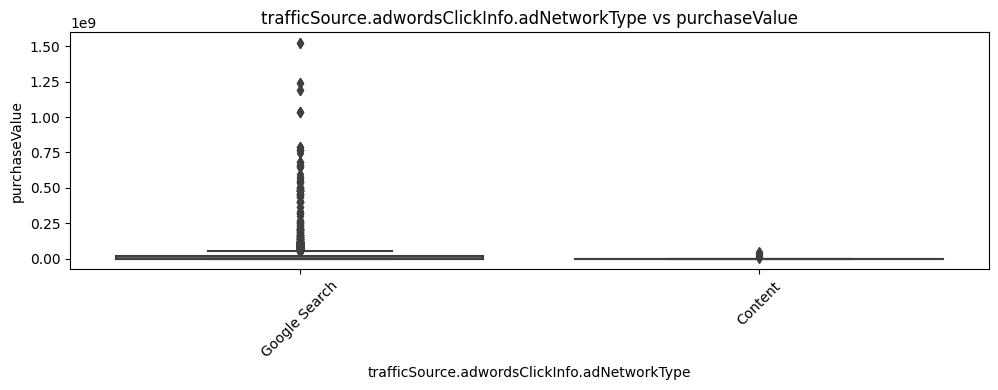

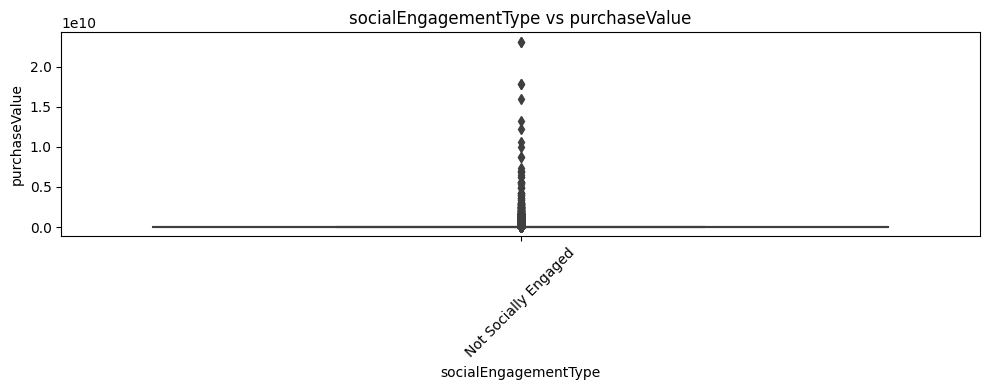

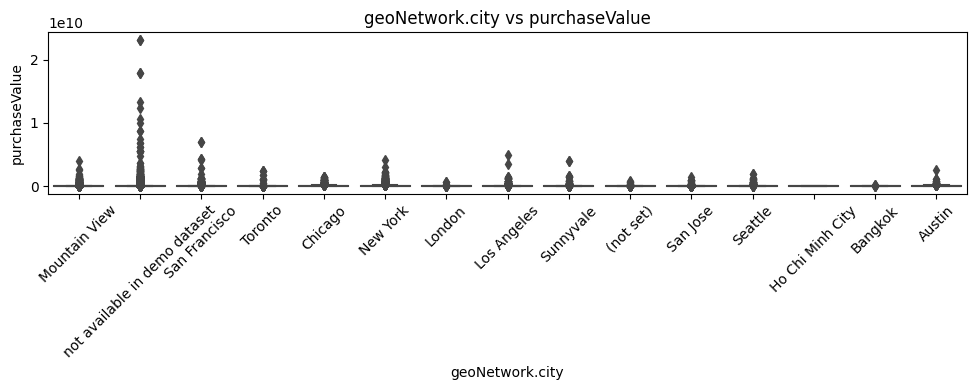

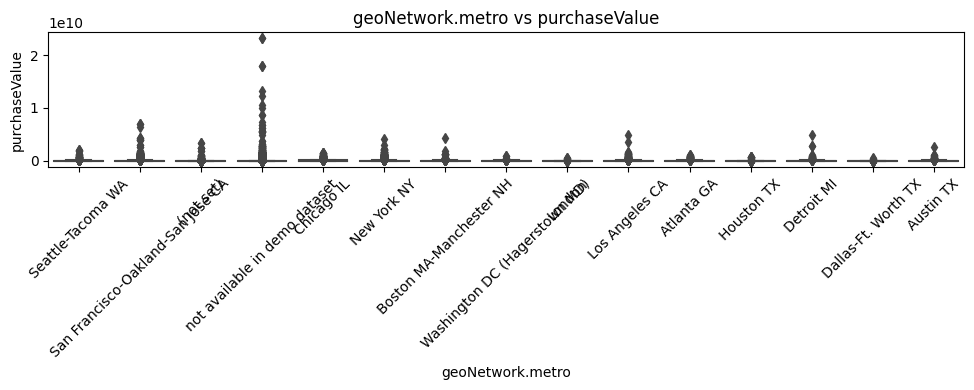

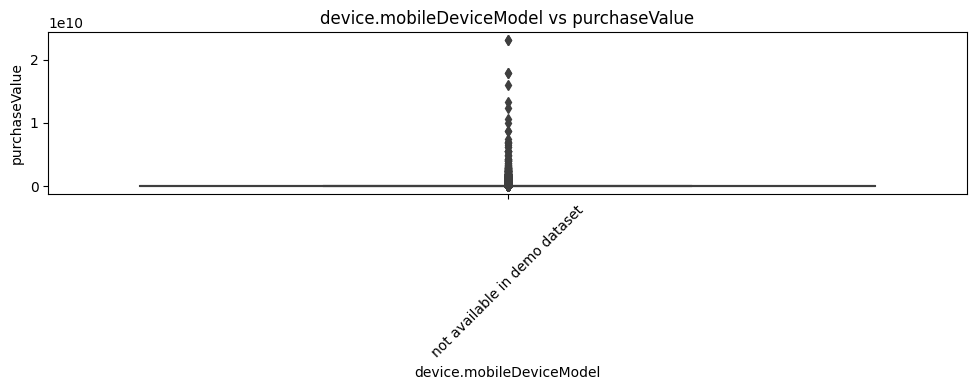

/tmp/ipykernel_13/3846104498.py:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


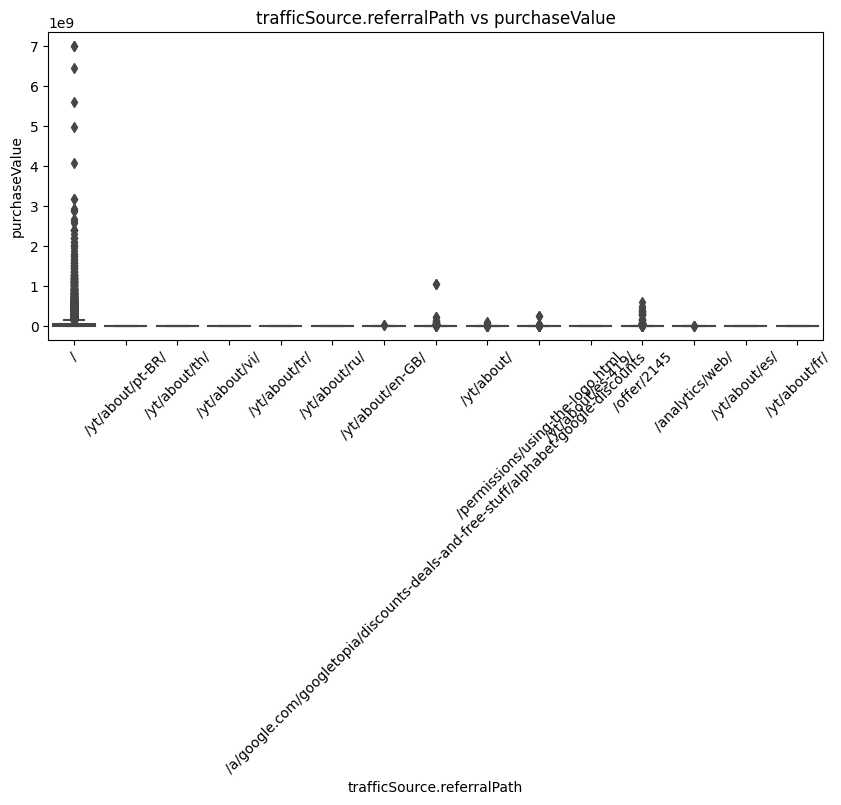

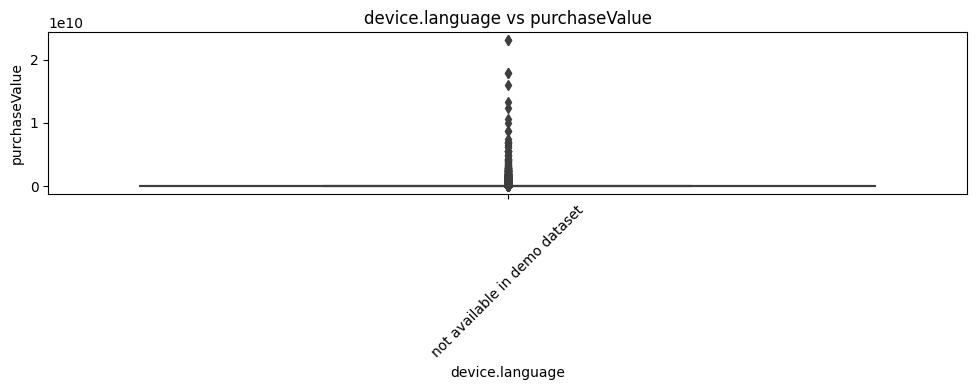

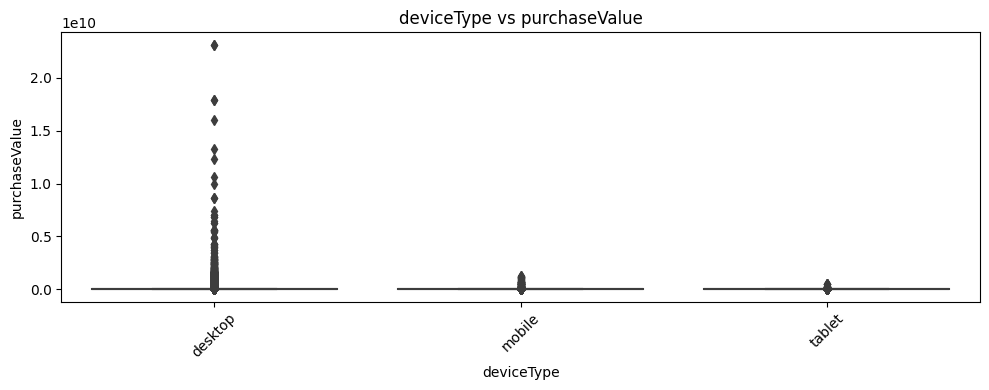

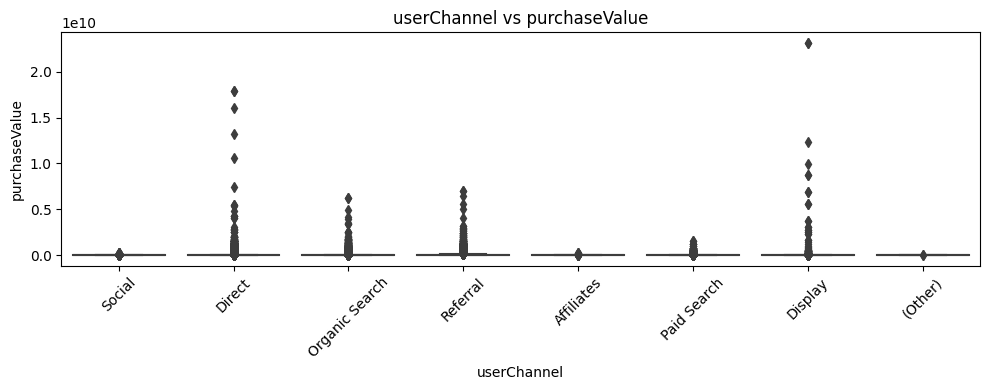

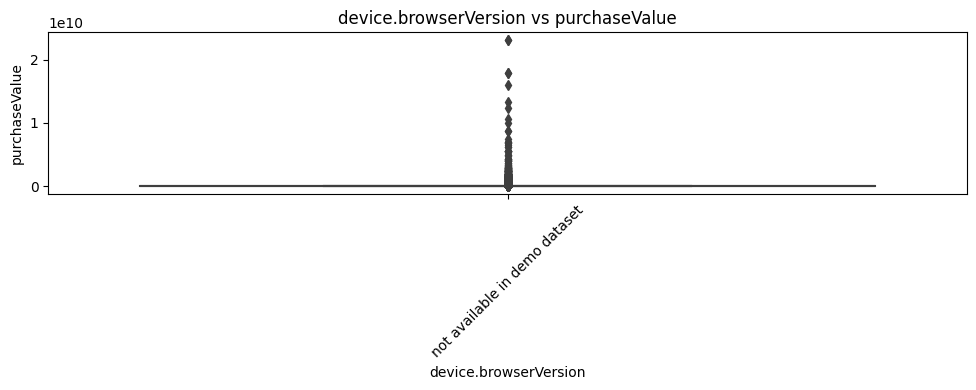

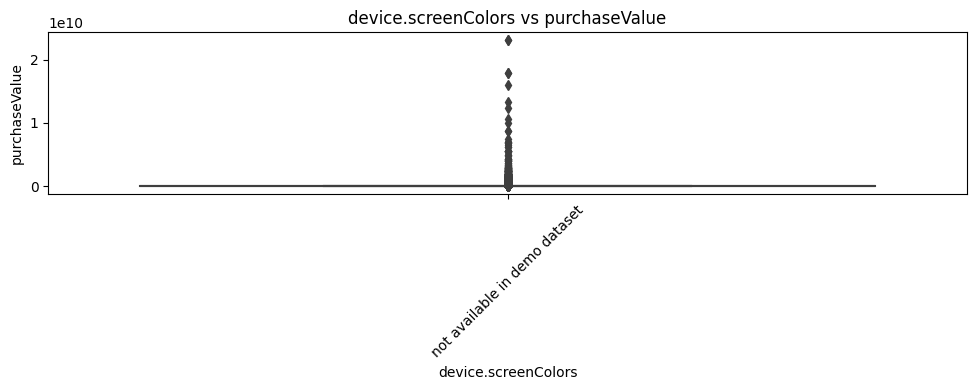

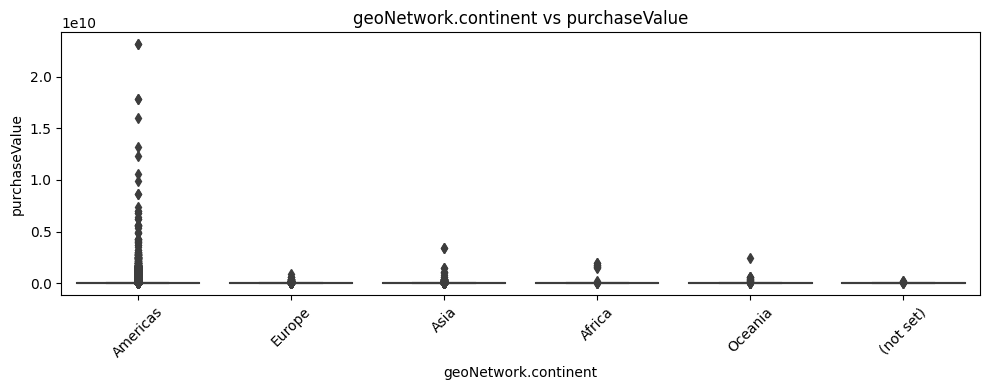

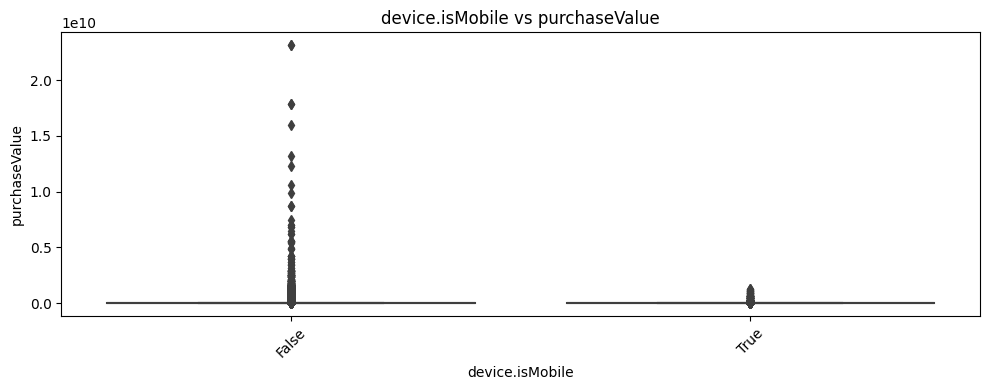

In [25]:
target = 'purchaseValue'
data = df.copy()

numerical = data.select_dtypes(include=['int64', 'float64', 'int32', 'UInt32']).columns.tolist()
categorical = data.select_dtypes(include=['object', 'bool']).columns.tolist()

if target in numerical:
    numerical.remove(target)

for col in numerical:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(data=df, x=col, y=target, alpha=0.3)
    plt.title(f"{col} vs {target}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

for col in categorical:
    plt.figure(figsize=(10, 4))
    # Limit categories to top 15 to keep plots readable
    top_vals = df[col].value_counts().index[:15]
    sns.boxplot(data=df[df[col].isin(top_vals)], x=col, y=target)
    plt.xticks(rotation=45)
    plt.title(f"{col} vs {target}")
    plt.tight_layout()
    plt.show()

# 4.Data Cleaning/Preprocessing

In [26]:
removalcount = 0
dropped_cols = []  

# Drop columns with 1 or fewer unique values
for col in df.columns:
    count = len(df[col].unique())
    if count <= 1:
        df = df.drop(col, axis=1)
        test_df = test_df.drop(col, axis=1)
        dropped_cols.append(col)
        removalcount += 1

# Print results
print(f"Total columns dropped: {removalcount + 2}")
print("Dropped columns:")
print(dropped_cols)

Total columns dropped: 19
Dropped columns:
['device.screenResolution', 'screenSize', 'device.mobileDeviceBranding', 'device.mobileInputSelector', 'device.mobileDeviceMarketingName', 'device.operatingSystemVersion', 'device.flashVersion', 'totals.visits', 'geoNetwork.networkLocation', 'browserMajor', 'device.browserSize', 'socialEngagementType', 'locationZone', 'device.mobileDeviceModel', 'device.language', 'device.browserVersion', 'device.screenColors']


In [27]:
duplicated_rows = df.duplicated(subset=[x for x in df.columns])
df = df.drop_duplicates(subset=[x for x in df.columns])

In [28]:
threshold = 0.9
df = df.loc[:, df.isnull().mean() < threshold]
test_df = test_df.loc[:, test_df.isnull().mean() < threshold]

In [29]:
df = df.drop(['trafficSource.keyword','trafficSource.referralPath','sessionStart'],axis =1 )
test_df = test_df.drop(['trafficSource.keyword','trafficSource.referralPath','sessionStart'],axis =1 )

In [30]:
df['totals.bounces'] = df['totals.bounces'].fillna(0).astype(int)
test_df['totals.bounces'] = test_df['totals.bounces'].fillna(0).astype(int)
df['new_visits'] = df['new_visits'].fillna(0).astype(int)
test_df['new_visits'] = test_df['new_visits'].fillna(0).astype(int)
df['trafficSource.isTrueDirect'] = df['trafficSource.isTrueDirect'].fillna(False).astype(bool)
test_df['trafficSource.isTrueDirect'] = test_df['trafficSource.isTrueDirect'].fillna(False).astype(bool)

/tmp/ipykernel_13/2562316619.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['trafficSource.isTrueDirect'] = df['trafficSource.isTrueDirect'].fillna(False).astype(bool)
/tmp/ipykernel_13/2562316619.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df['trafficSource.isTrueDirect'] = test_df['trafficSource.isTrueDirect'].fillna(False).astype(bool)


In [31]:
for data in [df, test_df]:
    if 'date' in data.columns:
        data['date'] = pd.to_datetime(data['date'].astype(str), format='%Y%m%d')
        data['day'] = data['date'].dt.day
        data['week'] = data['date'].dt.isocalendar().week
        data['month'] = data['date'].dt.month
        data['year'] = data['date'].dt.year
        data.drop(columns=['date'], inplace=True)


In [32]:
page_view_mean = df['pageViews'].mean()
df['pageViews'] = df['pageViews'].fillna(page_view_mean)
page_view_mean_2 = test_df['pageViews'].mean()
test_df['pageViews'] = test_df['pageViews'].fillna(page_view_mean_2)

In [33]:
Q1 = df['pageViews'].quantile(0.25)
Q3 = df['pageViews'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

df.loc[(df['pageViews'] > upper_bound), 'pageViews'] = upper_bound

In [34]:
df.shape , test_df.shape

((115787, 30), (29006, 29))

In [35]:
for col in df.columns:
    print(f" Column Name : {col} Length : {len(df[col].unique())}")

 Column Name : trafficSource.isTrueDirect Length : 2
 Column Name : purchaseValue Length : 6766
 Column Name : browser Length : 34
 Column Name : geoCluster Length : 5
 Column Name : userId Length : 100499
 Column Name : trafficSource.campaign Length : 28
 Column Name : geoNetwork.networkDomain Length : 3
 Column Name : gclIdPresent Length : 2
 Column Name : sessionNumber Length : 230
 Column Name : geoNetwork.region Length : 388
 Column Name : trafficSource Length : 161
 Column Name : sessionId Length : 107379
 Column Name : os Length : 18
 Column Name : geoNetwork.subContinent Length : 23
 Column Name : trafficSource.medium Length : 7
 Column Name : locationCountry Length : 193
 Column Name : geoNetwork.city Length : 695
 Column Name : geoNetwork.metro Length : 104
 Column Name : pageViews Length : 25
 Column Name : totals.bounces Length : 2
 Column Name : deviceType Length : 3
 Column Name : userChannel Length : 8
 Column Name : totalHits Length : 225
 Column Name : geoNetwork.conti

In [36]:
for col in df.columns:
    if df[col].nunique() == 1:
        df.drop(col, axis=1, inplace=True)

In [37]:
id_cols = [col for col in df.columns if 'id' in col.lower() or 'Id' in col]
df.drop(columns=id_cols, inplace=True, errors='ignore')

In [38]:
df.replace(['not set', 'not available'], np.nan, inplace=True)

In [39]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
non_numeric_cols = df.select_dtypes(exclude=['int64', 'float64']).columns

imputer = SimpleImputer(strategy='mean')
df_numeric = pd.DataFrame(imputer.fit_transform(df[numeric_cols]), columns=numeric_cols)

df_non_numeric = df[non_numeric_cols].reset_index(drop=True)

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=numeric_cols)

df_final = pd.concat([df_scaled, df_non_numeric], axis=1)

print(df_final.head())


   purchaseValue  sessionNumber  pageViews  totals.bounces  totalHits  \
0      -0.128782      -0.161716  -0.710332        1.207157  -0.489087   
1      -0.128782      -0.161716  -0.710332        1.207157  -0.489087   
2      -0.128782      -0.066128  -0.076366       -0.828393  -0.233447   
3      -0.128782      -0.161716  -0.710332        1.207157  -0.489087   
4       0.304757      -0.161716   2.142512       -0.828393   2.834233   

   new_visits  trafficSource.isTrueDirect            browser geoCluster  \
0    0.663496                       False               Edge   Region_2   
1    0.663496                        True             Chrome   Region_3   
2   -1.507169                        True             Chrome   Region_2   
3    0.663496                       False  Internet Explorer   Region_4   
4    0.663496                        True             Chrome   Region_3   

  trafficSource.campaign  ...                geoNetwork.city  \
0              (not set)  ...                 

# 5.Training-Validation Split

In [40]:
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()


In [41]:
numerical_cols = [col for col in numerical_cols if col not in ['sessionId', 'userId', 'purchaseValue']]

In [42]:
df[categorical_cols] = df[categorical_cols].fillna('missing')
test_df[categorical_cols] = test_df[categorical_cols].fillna('missing')

df[numerical_cols] = df[numerical_cols].fillna(0) 
test_df[numerical_cols] = test_df[numerical_cols].fillna(0)


In [43]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
test_encoded = pd.get_dummies(test_df, columns=categorical_cols, drop_first=True)

In [44]:
X = df_encoded.drop(columns=['purchaseValue'])
y = (df_encoded['purchaseValue'])


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [46]:
test_encoded = test_encoded.reindex(columns=X_train.columns, fill_value=0)

In [47]:
scaler = StandardScaler()
numeric_cols_scaled = [col for col in numerical_cols if col in df_encoded.columns]  

df_encoded[numeric_cols_scaled] = scaler.fit_transform(df_encoded[numeric_cols_scaled])
test_encoded[numeric_cols_scaled] = scaler.transform(test_encoded[numeric_cols_scaled])


# 6.Models

In [48]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "KNN Regressor": KNeighborsRegressor(),
    "XGBoost": XGBRegressor()
}

r2_scores = {}
rmse_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_r2 = r2_score(y_train, y_train_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    r2_scores[name] = test_r2
    rmse_scores[name] = test_rmse
    
    print(f"{name}:\n"
          f"  Train R² Score: {train_r2:.4f}, RMSE: {train_rmse:.4f}\n"
          f"  Test  R² Score: {test_r2:.4f}, RMSE: {test_rmse:.4f}\n")


Linear Regression:
  Train R² Score: 0.1208, RMSE: 184499884.3453
  Test  R² Score: -870965386699759.0000, RMSE: 6959102136947711.0000

Ridge Regression:
  Train R² Score: 0.1207, RMSE: 184506466.6939
  Test  R² Score: 0.1222, RMSE: 220927208.4708



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.574e+21, tolerance: 3.586e+17
  model = cd_fast.enet_coordinate_descent(


Lasso Regression:
  Train R² Score: 0.1208, RMSE: 184500755.3145
  Test  R² Score: 0.1221, RMSE: 220936456.7736

Decision Tree:
  Train R² Score: 1.0000, RMSE: 492853.4163
  Test  R² Score: -0.1623, RMSE: 254224170.3203

Random Forest:
  Train R² Score: 0.9282, RMSE: 52725474.2934
  Test  R² Score: 0.2446, RMSE: 204951182.6356

Gradient Boosting:
  Train R² Score: 0.6184, RMSE: 121551152.5342
  Test  R² Score: 0.1726, RMSE: 214491707.2277

KNN Regressor:
  Train R² Score: 0.4510, RMSE: 145793165.7951
  Test  R² Score: 0.2078, RMSE: 209879466.4793

XGBoost:
  Train R² Score: 0.8321, RMSE: 80614870.4581
  Test  R² Score: 0.2273, RMSE: 207275269.6564



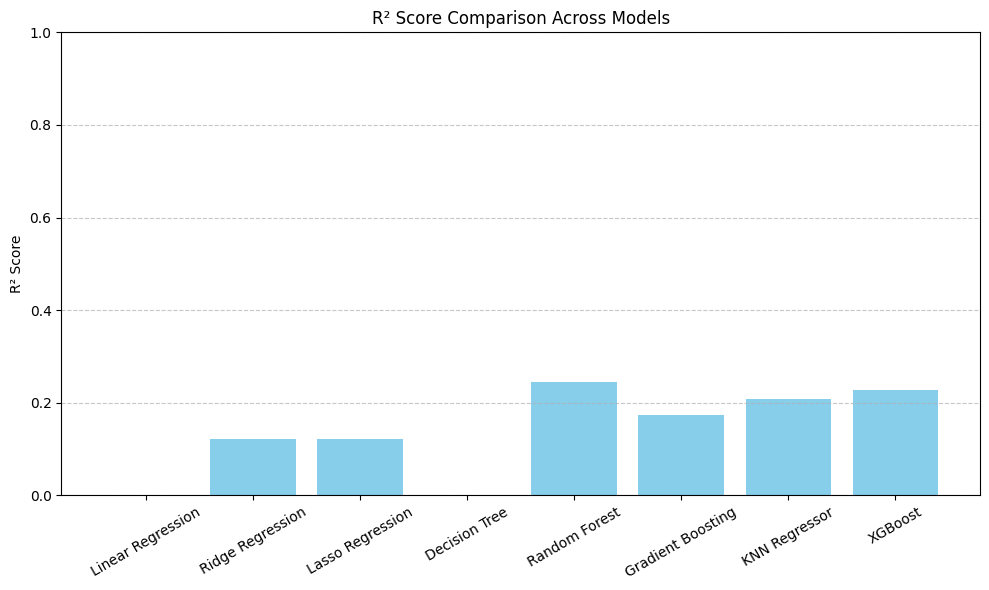

In [49]:
plt.figure(figsize=(10, 6))
plt.bar(r2_scores.keys(), r2_scores.values(), color='skyblue')
plt.ylabel("R² Score")
plt.title("R² Score Comparison Across Models")
plt.xticks(rotation=30)
plt.ylim(0, 1)  # Adjust based on range of scores
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 7.Hyperparameters and GridSearchCV

In [50]:
rf = RandomForestRegressor(random_state=42)

param_grid = {
    'max_depth': [20, 30],
    'min_samples_split': [2, 5],
    'n_estimators': [50, 100]                       
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_model_rf = grid_search.best_estimator_

rf_y_train_pred = best_model_rf.predict(X_train)
rf_y_test_pred = best_model_rf.predict(X_test)

rf_r2_train = r2_score(y_train, rf_y_train_pred)
rf_r2_test = r2_score(y_test, rf_y_test_pred)

print(f"R² Score on training set: {rf_r2_train:.4f}")
print(f"R² Score on test set: {rf_r2_test:.4f}")

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 100}
R² Score on training set: 0.9279
R² Score on test set: 0.2545


In [51]:
xgb = XGBRegressor(random_state=42, verbosity=0)
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_grid = GridSearchCV(xgb, xgb_param_grid, cv=5, scoring='r2', n_jobs=-1)
xgb_grid.fit(X_train, y_train)

print("Best XGB Params:", xgb_grid.best_params_)

best_xgb = xgb_grid.best_estimator_

xgb_y_train_pred = best_xgb.predict(X_train)
xgb_y_test_pred = best_xgb.predict(X_test)

xgb_r2_train = r2_score(y_train, xgb_y_train_pred)
xgb_r2_test = r2_score(y_test, xgb_y_test_pred)

print(f"R² Score on training set: {xgb_r2_train:.4f}")
print(f"R² Score on test set: {xgb_r2_test:.4f}")

/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best XGB Params: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
R² Score on training set: 0.8620
R² Score on test set: 0.2219


In [52]:
models = {
    "Stacked": StackingRegressor(
        estimators=[
            ('rf', RandomForestRegressor(n_estimators=100, max_depth=30, min_samples_split=2, random_state=42)),
            ('xgb', XGBRegressor(n_estimators=290, max_depth=9, random_state=42))
        ],
        final_estimator=Ridge(),
        n_jobs=-1  # speeds up training
    )
}

r2_scores = {}

# Train, predict, and evaluate each model
for name, model in models.items():
    print(f"\nModel: {name}")
    
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    print(f"Train R²: {r2_train:.4f}")
    print(f"Test  R²: {r2_test:.4f}")
    
    r2_scores[name] = {
        'Train R²': round(r2_train, 4),
        'Test R²': round(r2_test, 4)
    }


Model: Stacked
Train R²: 0.9596
Test  R²: 0.2718


In [53]:
stacked_model = models["Stacked"]

# 8.Save Model

In [54]:
y_test_pred = stacked_model.predict(test_encoded)

In [55]:
submission = pd.DataFrame({
    'id': range(len(y_test_pred)),
    'purchaseValue': y_test_pred
})


submission.to_csv('submission.csv', index=False)